In [105]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from random import randint
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Colocar los tags de mejor forma en el dataframe

In [127]:
detalles_animes = pd.read_csv(os.path.join("data", "MAL_dataframe.csv"))

In [128]:
detalles_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8978 entries, 0 to 8977
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8978 non-null   int64  
 1   title               8978 non-null   object 
 2   main_picture        8978 non-null   object 
 3   alternative_titles  8978 non-null   object 
 4   start_date          8976 non-null   object 
 5   end_date            8977 non-null   object 
 6   synopsis            8900 non-null   object 
 7   mean                8908 non-null   float64
 8   rank                8474 non-null   float64
 9   popularity          8978 non-null   int64  
 10  num_list_users      8978 non-null   int64  
 11  num_scoring_users   8978 non-null   int64  
 12  media_type          8978 non-null   object 
 13  status              8978 non-null   object 
 14  num_episodes        8978 non-null   int64  
 15  start_season        8826 non-null   object 
 16  studio

In [137]:
tags_animes = pd.read_csv(os.path.join('data', 'titulos_1.csv'))

In [138]:
tags_animes

,Anime,URL,Tags,Alts,MAL_ID
0,Cowboy Bebop,https://www.anime-planet.com/anime/cowboy-bebop,"['Action', 'Adventure', 'Drama', 'Sci Fi', 'Bo...",[''],1
1,puzzledragonsx,https://www.anime-planet.com/anime/puzzle-and-...,"['Fantasy', 'Proxy Battles', 'Based on a Video...",[''],32772
2,Cowboy Bebop: The Movie,https://www.anime-planet.com/anime/cowboy-bebo...,"['Action', 'Sci Fi', 'Bounty Hunters', 'Mars',...",[''],5
3,Trigun,https://www.anime-planet.com/anime/trigun,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",[''],6
4,Witch Hunter Robin,https://www.anime-planet.com/anime/witch-hunte...,"['Fantasy', 'Noir', 'Psychic Powers', 'Superna...",[''],7
...,...,...,...,...,...
6776,Girls und Panzer der Film: Arisu War!,https://www.anime-planet.com/anime/girls-und-p...,"['Action', 'Military', 'Military School', 'Sch...",[''],32740
6777,Dragon Ball Super,https://www.anime-planet.com/anime/dragon-ball...,"['Action', 'Comedy', 'Aliens', 'Gods', 'Hand t...",[''],30694
6778,popinq,https://www.anime-planet.com/anime/pop-in-q,"['Drama', 'Fantasy', 'Coming of Age', 'Dancing...",[''],30695
6779,The Guardian Brothers,https://www.anime-planet.com/anime/the-guardia...,"['Adventure', 'Comedy', 'Fantasy', 'Chinese An...","['Little Door Gods', 'Xiao Men Shen']",32751


In [139]:
# Convertir los posibles valores NaN de Tags a "" (caso hipótetico)

tags_animes['Tags'] = tags_animes['Tags'].fillna("")

In [140]:
# Será conveniente renombrar MAL_ID a id para poder hacer un merge con el dataframe de
# detalles_animes

tags_animes = tags_animes.rename(columns={'MAL_ID': 'id'})

Para obtener los tags, lo que se pensó fue primeramente obtener un conjunto con todos los tags
existentes. Luego, se colocaría un 1 en cada tag que tuviera el anime, y un 0 en los que no. Así,
se puede trabajar más eficientemente con los tags y dar cuenta de si un anime presenta un tag o no. 

In [141]:
# Obtener todos los tags únicos en el DataFrame

all_tags = set(
    tag.strip() if isinstance(tags_str, str) else tag
    for tags_str in tags_animes["Tags"]
    for tag in (
        tags_str.strip("[]").split(",") if isinstance(tags_str, str) else tags_str
    )
)


# Además, quitar las ' de los tags, que no sirven de nada, y están al comienzo y al final de cada
# tag

all_tags = set(tag.strip("'") for tag in all_tags)

# Eliminar el tag fantasma de all_tags, cuyo valor es ""; no sirve de nada la verdad.
try:
    all_tags.remove("")
except KeyError:
    pass
try:
    all_tags.remove(" ")
except KeyError:
    pass
try:
    all_tags.remove("")
except KeyError:
    pass
try:
    all_tags.remove(" ")
except KeyError:
    pass
try:
    all_tags.remove("  ")
except KeyError:
    pass

# Crear columnas para cada tag en el DataFrame
for tag in all_tags:
    tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)

C:\Users\mativ\AppData\Local\Temp\ipykernel_58108\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)
C:\Users\mativ\AppData\Local\Temp\ipykernel_58108\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)
C:\Users\mativ\AppData\Local\Temp\ipykernel_58108\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [143]:
# Por conveniencia, lo más útil es eliminar la columna "URL", junto a "Tags" y "Alts", que ya no
# sirven de nada. Además se establece la columna "MAL_ID" como índice.

tags_animes = tags_animes.drop(columns=["URL", "Tags", "Alts", "Anime"]).set_index("id")

In [145]:
# El MAL_ID de índice puede conectarse con los datos de detalles_animes, que también tienen MAL_ID,
# y así se puede obtener que el índice sea el title de cada anime, que es más útil y fácil de
# visualizar. 

tags_animes = tags_animes.join(detalles_animes.set_index("id")["title"])

In [147]:
# Cambio de índice a title, eliminación del índice actual igualmente.

tags_animes = tags_animes.set_index("title")

In [149]:
# Por temas de memoria principalmente, es conveniente hacer el dataframe sparse.

tags_animes = tags_animes.astype(pd.SparseDtype(np.int8, fill_value=0))

In [150]:
tags_animes

,Comedy,Episodic,Germany,Commercials,Star-Crossed Lovers,Contemporary Fantasy,Gyaru,Alice in Wonderland,Hell,Poland,...,Based on a Webtoon,Weak to Strong,Pirates,Roommates,Disney,Restaurants,Transforming Mecha,Student-Teacher Relationship,Based on a Movie,Forest
title,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cowboy Bebop: Tengoku no Tobira,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigun,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Witch Hunter Robin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bouken Ou Beet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guaishou Xiao Guan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Good Night World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jujutsu Kaisen 2nd Season Recaps,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Análisis exploratorio del dataframe de tags (sin gráficos)

In [151]:
# En primer lugar, notar que tenemos la siguiente cantidad de tags:

len(tags_animes.columns)

581

In [152]:
# Para ver duplicados, usar el método duplicated(); luego las organizamos para que se vea mejor que
# los datos efecticamente están duplicados. Consideramos duplicados solamente si tienen el mismo
# índice, es decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

duplicated_animes = tags_animes[tags_animes.index.duplicated(keep=False)].sort_index()

# Verificamos que efectivamente son duplicados

duplicated_animes

,Comedy,Episodic,Germany,Commercials,Star-Crossed Lovers,Contemporary Fantasy,Gyaru,Alice in Wonderland,Hell,Poland,...,Based on a Webtoon,Weak to Strong,Pirates,Roommates,Disney,Restaurants,Transforming Mecha,Student-Teacher Relationship,Based on a Movie,Forest
title,,,,,,,,,,,,,,,,,,,,,
5-toubun no Hanayome,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-toubun no Hanayome,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-toubun no Hanayome Movie,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-toubun no Hanayome Movie,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-toubun no Hanayome∽,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuru Yuri Nachuyachumi!+,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yuru Yuri Nachuyachumi!+,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yuru Yuri♪♪,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Eliminar los duplicados, utilizando el método drop_duplicates(), inplace=True para que se haga el
# cambio. Consideramos para la deleción solamente los duplicados que tienen el mismo índice, es
# decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

# Encuentra los índices de las filas duplicadas basándote en el índice (anime)
duplicated_indices = tags_animes[tags_animes.index.duplicated()].index

# Elimina las filas duplicadas utilizando los índices
tags_animes.drop(index=duplicated_indices, inplace=True)

In [154]:
tags_animes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6644 entries, Cowboy Bebop to Tunshi Xingkong 3rd Season
Columns: 581 entries, Comedy to Forest
dtypes: Sparse[int32, 0](581)
memory usage: 412.6+ KB


Como ya se trabajó previamente, los tipos de datos son los pertinentes. Además, efectivamente el
nombre de cada columna del dataframe logra ser idóneo, pues se entiende que cada columna representa
el nombre de un tag existente en Anime-Planet. Debido al trabajo ya realizado en el dataframe, se
ve que es inútil comprobar la existencia de valores nulos. 

Por otro lado, se comprueba efectivamente la ventaja de que el dataframe sea sparse, pues tiene un uso en memoria relativamente
bajo para la cantidad de datos que contiene.

In [155]:
# Promedio de los tags

tags_animes.mean().sort_values(ascending=False)

Based on a Manga    0.376430
Action              0.320138
Comedy              0.318332
Fantasy             0.228326
Sci Fi              0.212222
                      ...   
Belgium             0.000151
Orphanage           0.000151
Poland              0.000151
1st Century         0.000151
3rd Century         0.000151
Length: 581, dtype: float64

In [156]:
# ¿Cuál es el tag menos común? ¿Cuántos animes tienen ese tag?

tags_animes.sum().sort_values(ascending=True)

Water Polo             1
Disney                 1
Stalkers               1
Hockey                 1
Sheep                  1
                    ... 
Sci Fi              1410
Fantasy             1517
Comedy              2115
Action              2127
Based on a Manga    2501
Length: 581, dtype: int32

In [157]:
print(f"El tag menos común es {tags_animes.sum().sort_values(ascending=True).index[0]}")

# ¿Existen más tags que aparecen dicha cantidad de veces exactamente?

print(f"Existen {len(tags_animes.sum().sort_values(ascending=True)[tags_animes.sum().sort_values(ascending=True) == 1])} tags que aparecen {tags_animes.sum().sort_values(ascending=True)[0]} veces, específicamente, sus nombres son los siguientes:")

for tag in tags_animes.sum().sort_values(ascending=True)[tags_animes.sum().sort_values(ascending=True) == 1].index:
    print(f"\t{tag}")

El tag menos común es Water Polo
Existen 31 tags que aparecen 1 veces, específicamente, sus nombres son los siguientes:
	Water Polo
	Disney
	Stalkers
	Hockey
	Sheep
	13th Century
	Hosts
	Surfing
	12th Century
	Seals
	Tibet
	Martial Arts School
	3rd Century
	Vietnam
	Pandas
	Dodgeball
	India
	Flower Shop
	Transported Into a Novel
	Gynophobia
	Belgium
	10th Century
	BDSM
	Unicorns
	Antique Shop
	Centaurs
	1st Century
	CEOs
	Orphanage
	Poland
	Pregnancy


In [158]:
# ¿Cuál es el tag más común? ¿Cuántos animes tienen ese tag?

tags_animes.sum().sort_values(ascending=False)

Based on a Manga    2501
Action              2127
Comedy              2115
Fantasy             1517
Sci Fi              1410
                    ... 
Belgium                1
Orphanage              1
Poland                 1
1st Century            1
3rd Century            1
Length: 581, dtype: int32

In [159]:
print(
    f"El tag más común es {tags_animes.sum().sort_values(ascending=False).index[0]}"
)

# Obtén el número de veces que aparece el tag más común
max_tag_count = tags_animes.sum().max()

# ¿Existen más tags que solo aparecen la misma cantidad de veces que el tag más común?
count_same_as_max = (tags_animes.sum() == max_tag_count).sum()
print(
    f"Existen {count_same_as_max} tags que aparecen {max_tag_count} veces. Sus nombres son los siguientes:"
)

# Imprime los nombres de los tags que aparecen la misma cantidad de veces que el tag más común
for tag in tags_animes.columns[tags_animes.sum() == max_tag_count]:
    print(f"\t{tag}")

El tag más común es Based on a Manga
Existen 1 tags que aparecen 2501 veces. Sus nombres son los siguientes:
	Based on a Manga


In [160]:
# ¿Cuál es el anime con más tags de todos? ¿Cuántos tags tiene?

tags_animes.sum(axis=1).sort_values(ascending=False)

title
Tian Guan Cifu                                            27
Monster                                                   27
Happy Sugar Life                                          26
Made in Abyss: Retsujitsu no Ougonkyou                    23
He Wei Dao x Re:Cong Ling Kaishi de Yi Shijie Shenghuo    22
                                                          ..
Mai no Mahou to Katei no Hi                                0
True Tears: Raigomaru to Jibeta no Monogatari              0
Princess Lover!: Magical Knight Maria-chan                 0
Mukougaoka Chisato wa Tada Mitsumeteita no Datta           0
Viva Namida                                                0
Length: 6644, dtype: int32

In [161]:
max_tags_anime_index = tags_animes.sum(axis=1).idxmax()
max_tags_anime_count = tags_animes.sum(axis=1).max()

print(f"El anime con más tags es {max_tags_anime_index}, con {max_tags_anime_count} tags.")

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con más tags?
same_tags_anime_indices = tags_animes.index[tags_animes.sum(axis=1) == max_tags_anime_count]
same_tags_anime_count = len(same_tags_anime_indices)

print(f"Existen {same_tags_anime_count} animes que tienen {max_tags_anime_count} tags. Sus nombres son los siguientes:")
for anime in same_tags_anime_indices:
    print(f"\t{anime}")

El anime con más tags es Monster, con 27 tags.
Existen 2 animes que tienen 27 tags. Sus nombres son los siguientes:
	Monster
	Tian Guan Cifu


In [162]:
# ¿Cuál es el anime con menos tags de todos? ¿Cuántos tags tiene?

tags_animes.sum(axis=1).sort_values(ascending=True)

title
W: Wish Omake                                  0
Shin Koihime†Musou: Otome Tairan OVA Omake     0
Mai no Mahou to Katei no Hi                    0
Hikenai Guitar wo Hikundaze                    0
Princess Lover!: Magical Knight Maria-chan     0
                                              ..
Re:Zero kara Hajimeru Isekai Seikatsu         22
Made in Abyss: Retsujitsu no Ougonkyou        23
Happy Sugar Life                              26
Monster                                       27
Tian Guan Cifu                                27
Length: 6644, dtype: int32

In [163]:
min_tags_anime_index = tags_animes.sum(axis=1).idxmin()
min_tags_anime_count = tags_animes.sum(axis=1).min()

print(
    f"El anime con menos tags es {min_tags_anime_index}, con {min_tags_anime_count} tags."
)

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con menos tags?
same_tags_anime_indices = tags_animes.index[
    tags_animes.sum(axis=1) == min_tags_anime_count
]
same_tags_anime_count = len(same_tags_anime_indices)

print(
    f"Existen {same_tags_anime_count} animes que tienen {min_tags_anime_count} tags. Sus nombres son los siguientes:"
)
for anime in same_tags_anime_indices:
    print(f"\t{anime}")

El anime con menos tags es Prism Ark Specials, con 0 tags.
Existen 20 animes que tienen 0 tags. Sus nombres son los siguientes:
	Prism Ark Specials
	Mukougaoka Chisato wa Tada Mitsumeteita no Datta
	Princess Lover!: Magical Knight Maria-chan
	True Tears: Raigomaru to Jibeta no Monogatari
	Mai no Mahou to Katei no Hi
	W: Wish Omake
	Shin Koihime†Musou: Otome Tairan - Gakuensai da yo! Zenin Shuugou no Koto
	Rio: Rainbow Gate! Special
	.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!
	Yumemakura Baku Twilight Gekijou
	Shin Koihime†Musou: Otome Tairan OVA Omake
	.hack//Versus: The Thanatos Report
	Reunion (Music)
	Viva Namida
	Tokyo Babylon: Vision
	Hikenai Guitar wo Hikundaze
	Decadence: Remix
	Sobakasu
	Kami nomi Kakushi
	COLORs


Esto último de animes con 0 tags parece ser que son animes a los cuales se les olvidó colocar algo. 

Muy probablemente sea porque son animes poco conocidos a los cuales no se les ha dado mucha
atención, lo que provoca que no se les coloque tags. 

Se revisó dichos animes en Anime-Planet y efectivamente no cuentan con tags, so no se puede hacer
nada al respecto para solventar aquello. 

In [164]:
# ¿Cuál es el promedio de cantidad de tags por anime?

tags_animes.sum(axis=1).mean()


6.949578567128236

In [165]:
# ¿Cuál es la mediana de cantidad de tags por anime?

tags_animes.sum(axis=1).median()

6.0

In [166]:
# ¿Cuál es la moda de cantidad de tags por anime?

tags_animes.sum(axis=1).mode()

0    6
dtype: int32

In [167]:
# ¿Cuál es la desviación estándar de cantidad de tags por anime?

tags_animes.sum(axis=1).std()


3.388980487261025

Los estadísticos apuntan a una distribución más o menos normal, con una media, mediana y moda
similares, junto a una desviación estándar relativamente baja. 

### Análisis exploratorio del dataframe de tags (con gráficos)

In [168]:
# ¿Cómo será la correlación entre los tags? ¿Será que hay tags que siempre aparecen juntos?

tags_animes.corr()

,Comedy,Episodic,Germany,Commercials,Star-Crossed Lovers,Contemporary Fantasy,Gyaru,Alice in Wonderland,Hell,Poland,...,Based on a Webtoon,Weak to Strong,Pirates,Roommates,Disney,Restaurants,Transforming Mecha,Student-Teacher Relationship,Based on a Movie,Forest
Comedy,1.000000,0.047670,-0.016773,-0.037306,-0.033576,0.011344,0.022858,0.004224,0.015893,-0.008384,...,0.055132,0.014110,-0.005379,0.075246,0.017954,0.022479,-0.033540,-0.012234,-0.030258,-0.014872
Episodic,0.047670,1.000000,-0.003806,-0.010617,-0.007619,0.025434,-0.005384,-0.005384,0.043492,-0.001903,...,-0.010787,-0.008082,-0.014167,-0.009139,-0.001903,0.060272,-0.010787,-0.005036,-0.006866,0.017927
Germany,-0.016773,-0.003806,1.000000,-0.001680,-0.001206,-0.004302,-0.000852,-0.000852,-0.000522,-0.000301,...,-0.001707,-0.001279,-0.002242,-0.001447,-0.000301,-0.001415,-0.001707,-0.000797,-0.001087,-0.001707
Commercials,-0.037306,-0.010617,-0.001680,1.000000,-0.003364,0.000989,-0.002377,-0.002377,-0.001455,-0.000840,...,-0.004763,-0.003569,-0.006255,-0.004035,-0.000840,-0.003946,-0.004763,-0.002224,-0.003032,-0.004763
Star-Crossed Lovers,-0.033576,-0.007619,-0.001206,-0.003364,1.000000,-0.008611,-0.001706,-0.001706,-0.001044,-0.000603,...,-0.003418,-0.002561,-0.004489,-0.002896,-0.000603,-0.002832,-0.003418,-0.001596,-0.002175,-0.003418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurants,0.022479,0.060272,-0.001415,-0.003946,-0.002832,0.036122,-0.002001,-0.002001,-0.001225,-0.000707,...,-0.004010,-0.003004,-0.005266,-0.003397,-0.000707,1.000000,-0.004010,-0.001872,-0.002552,0.033833
Transforming Mecha,-0.033540,-0.010787,-0.001707,-0.004763,-0.003418,-0.012193,-0.002415,-0.002415,-0.001479,-0.000854,...,-0.004840,-0.003626,-0.006356,-0.004100,-0.000854,-0.004010,1.000000,-0.002259,-0.003080,-0.004840
Student-Teacher Relationship,-0.012234,-0.005036,-0.000797,-0.002224,-0.001596,-0.005692,-0.001128,-0.001128,-0.000690,-0.000398,...,-0.002259,-0.001693,-0.002967,-0.001914,-0.000398,-0.001872,-0.002259,1.000000,-0.001438,-0.002259
Based on a Movie,-0.030258,-0.006866,-0.001087,-0.003032,-0.002175,-0.007760,-0.001537,-0.001537,-0.000941,-0.000543,...,-0.003080,-0.002308,-0.004045,-0.002610,-0.000543,-0.002552,-0.003080,-0.001438,1.000000,-0.003080


De reojo se observan muchas correlaciones negativas, pero muy insignificantes al ser muy cercanas a 0.

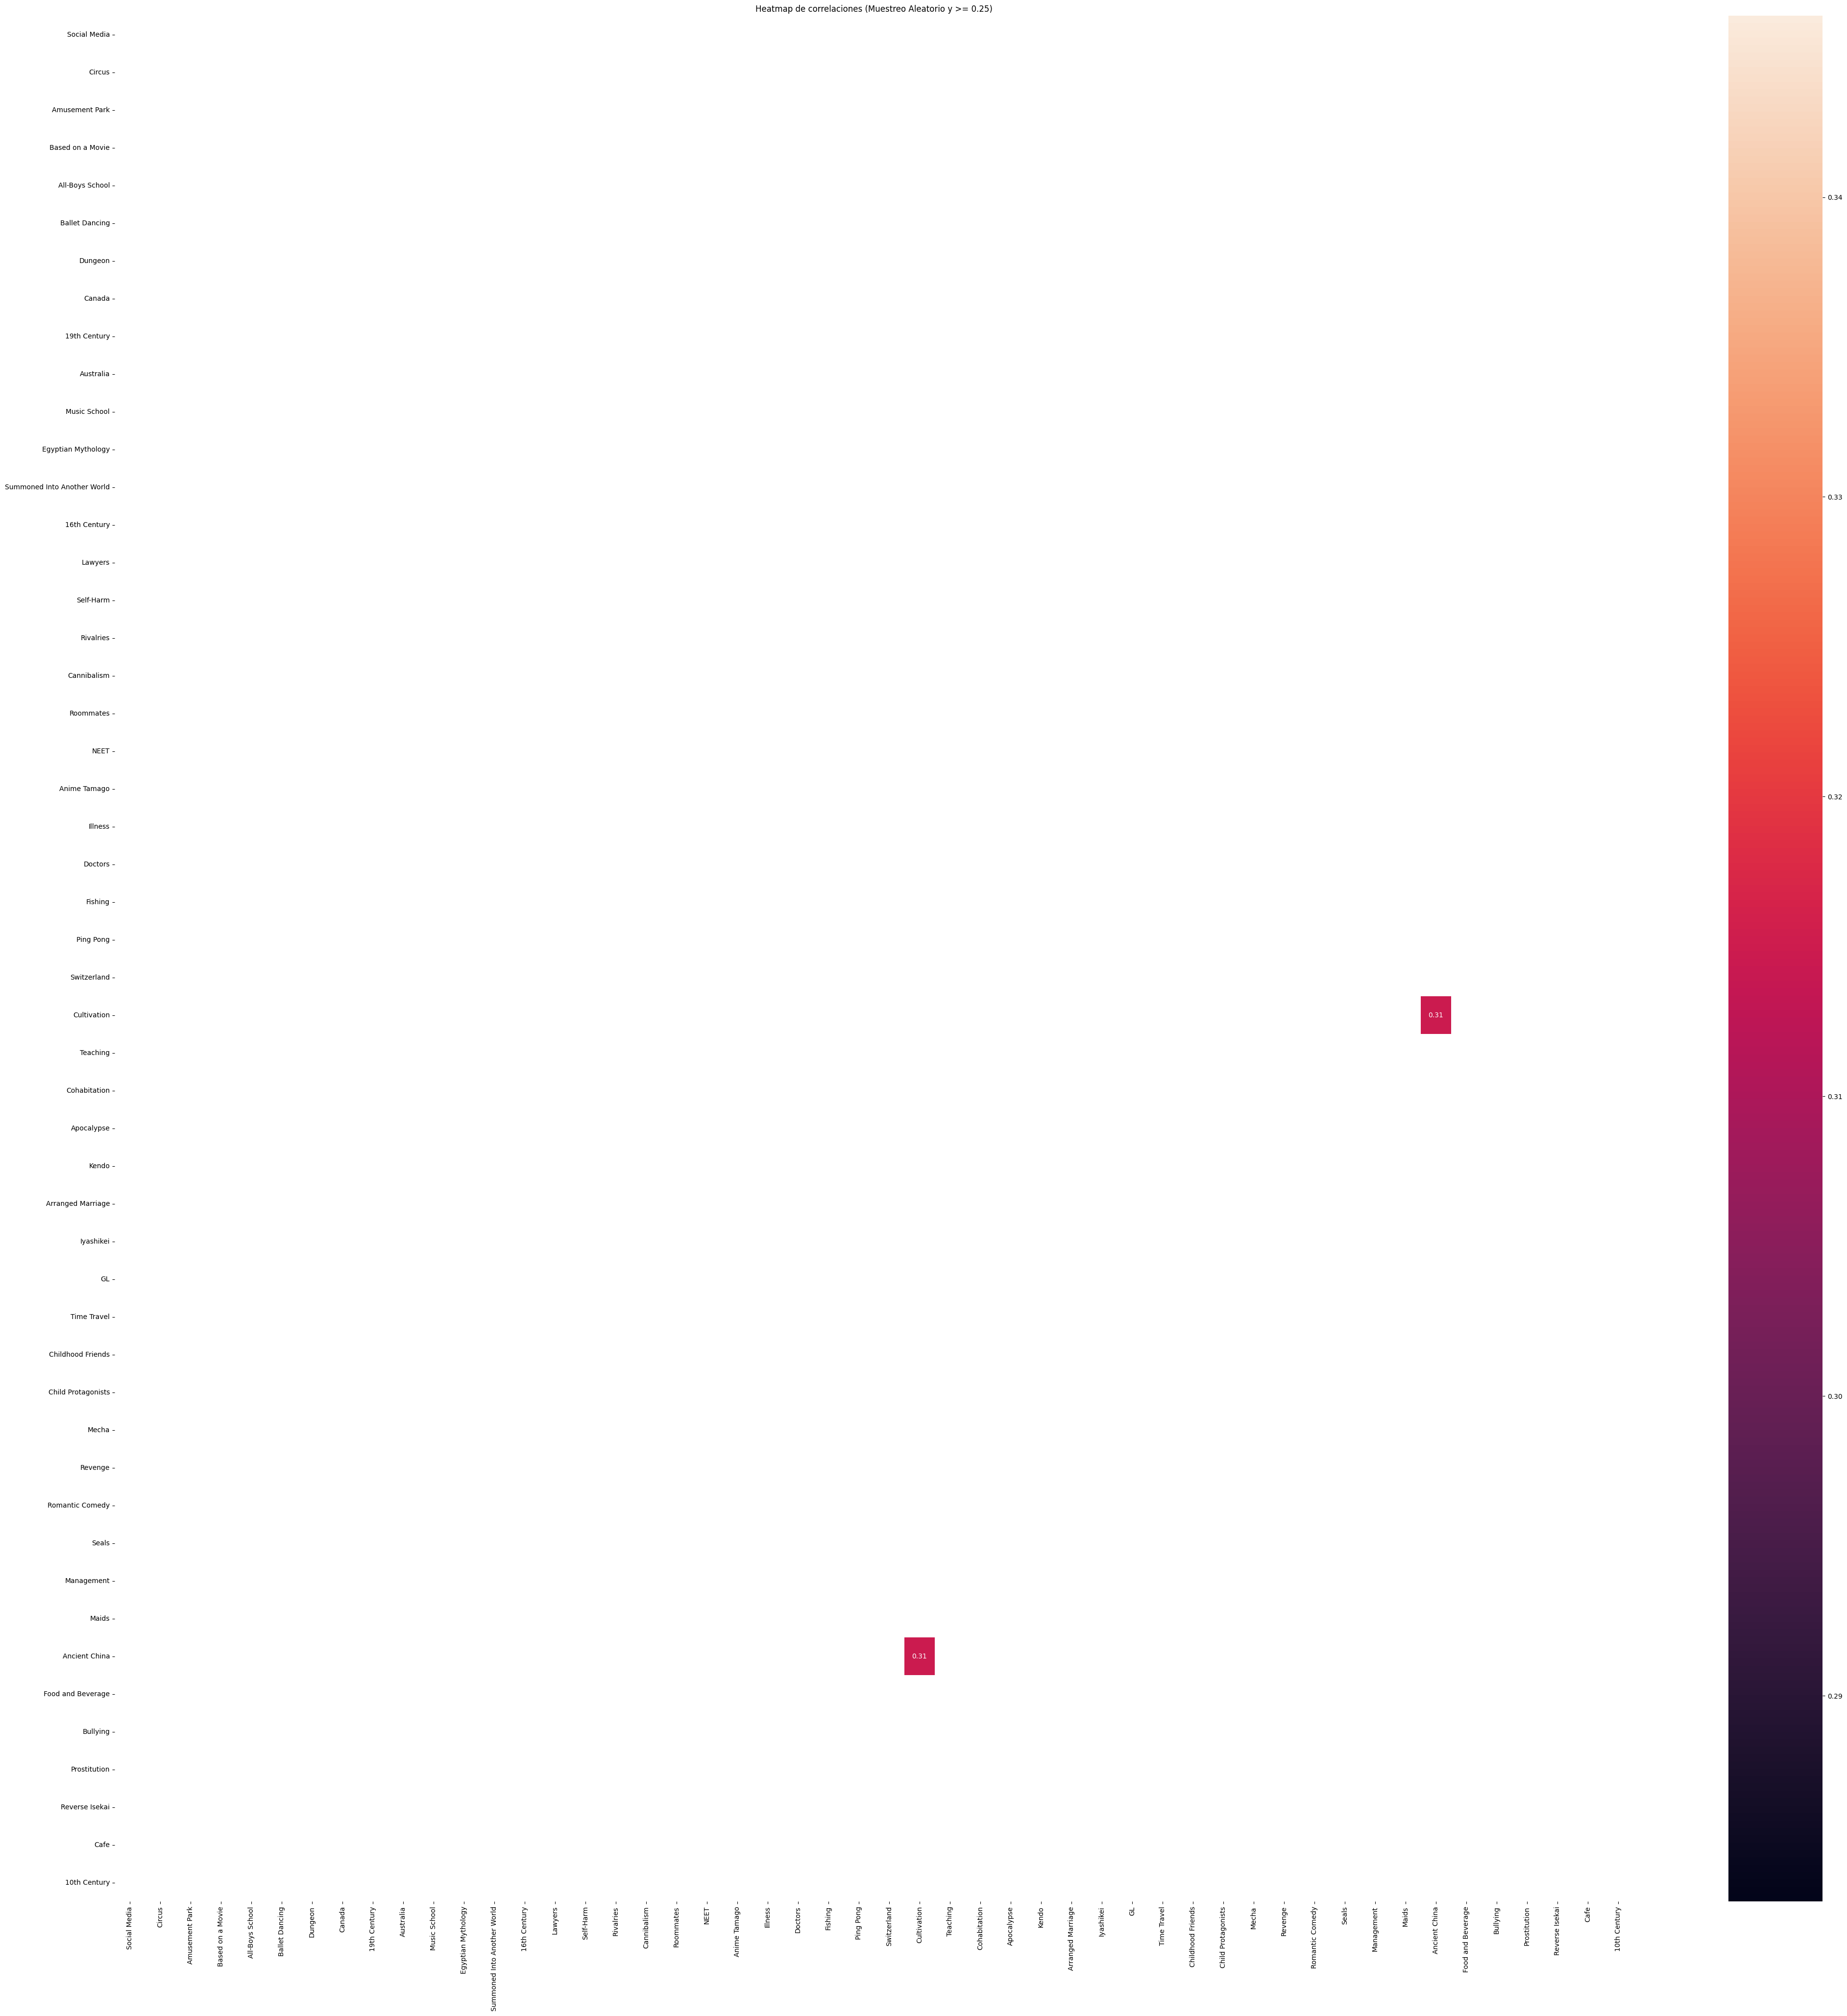

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


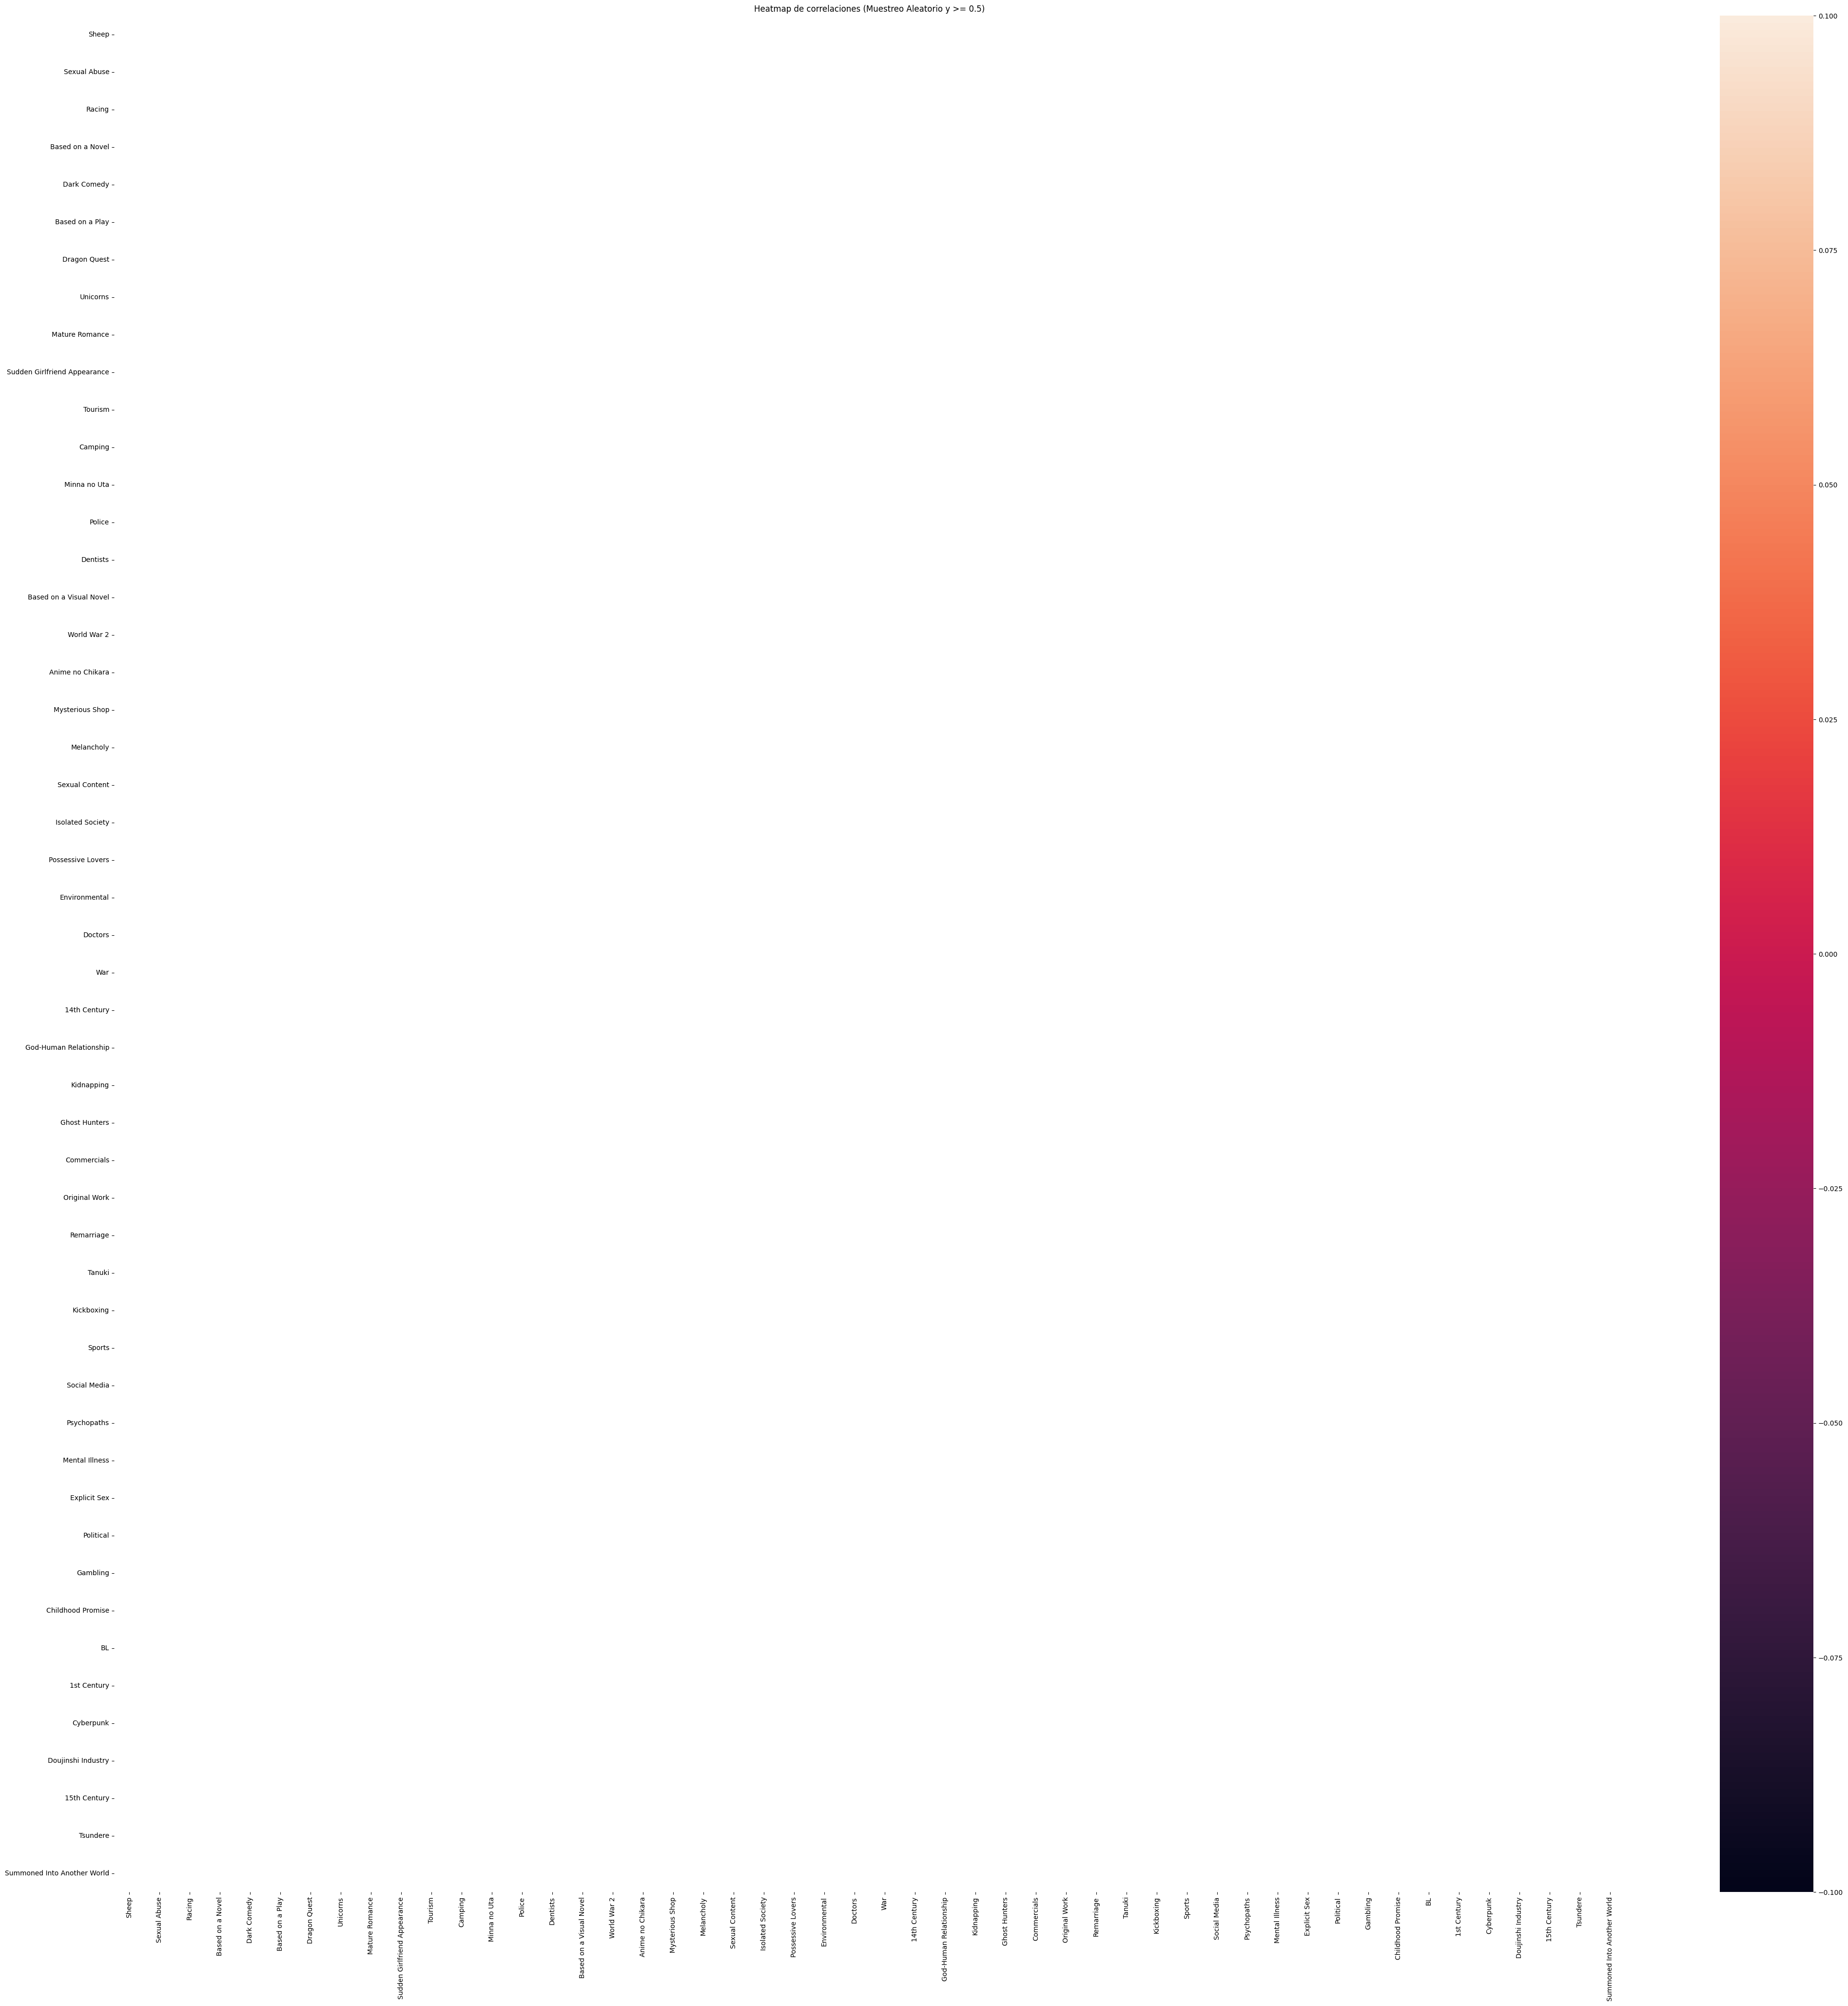

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


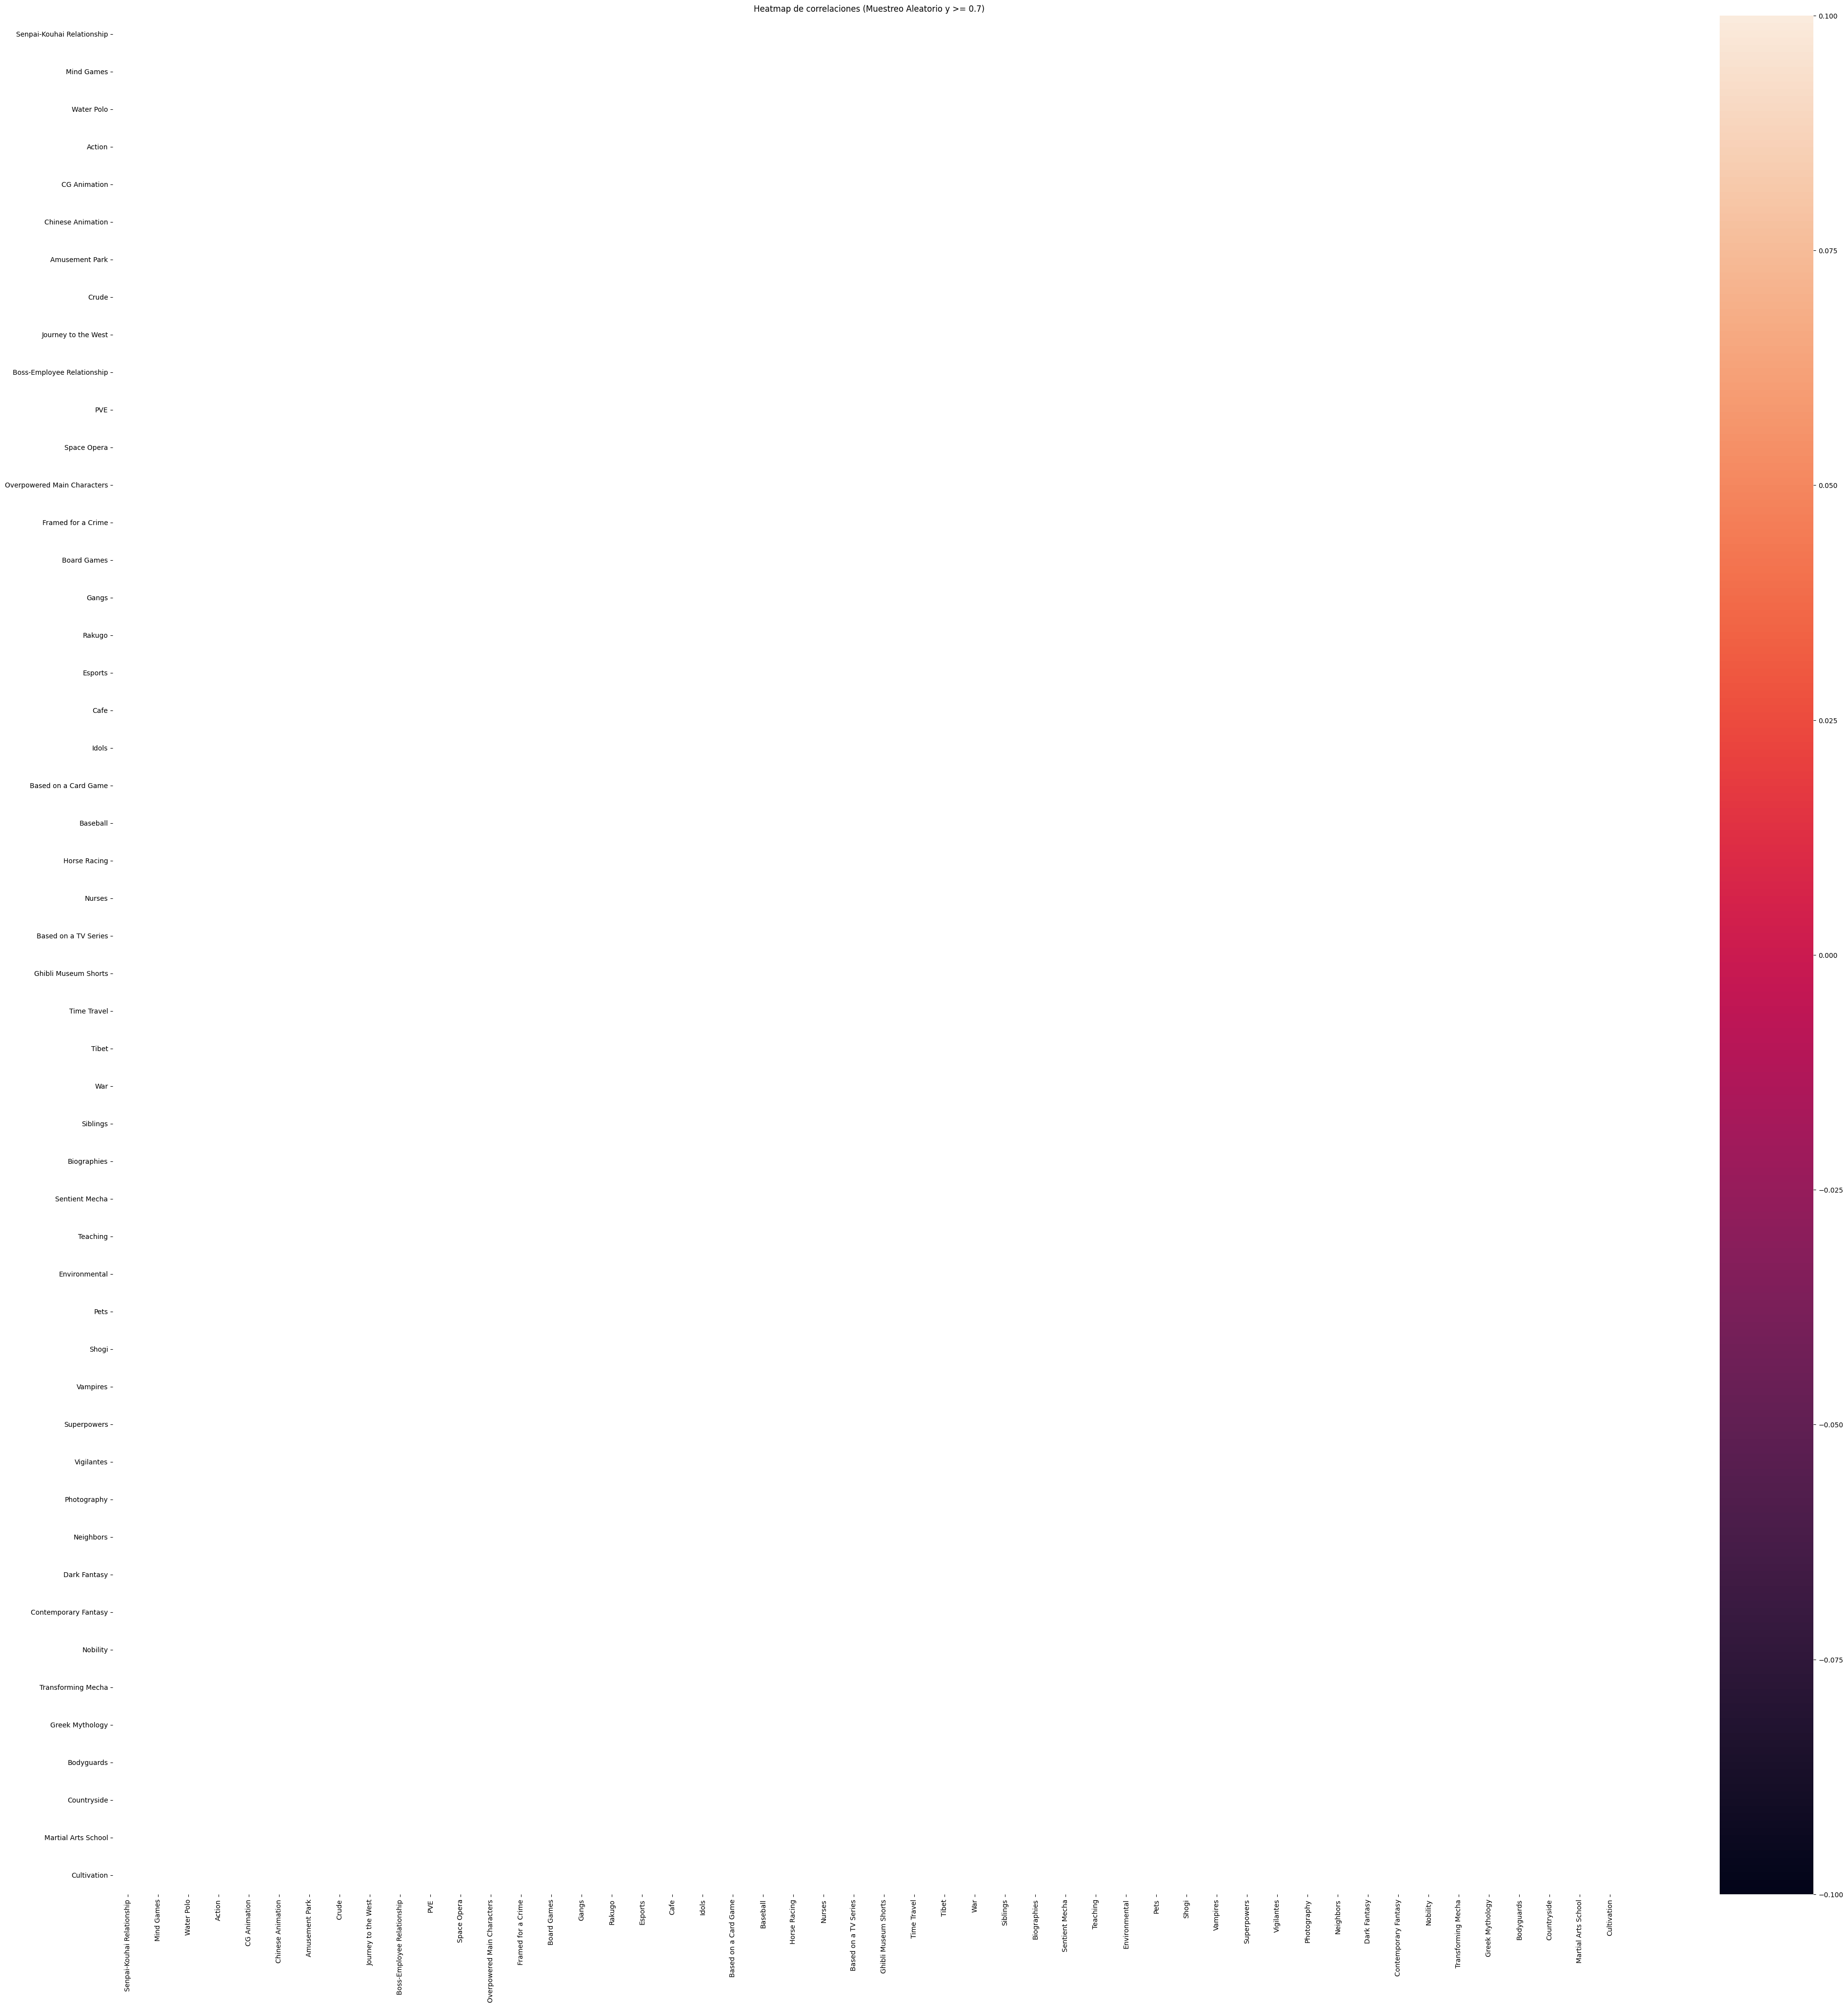

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


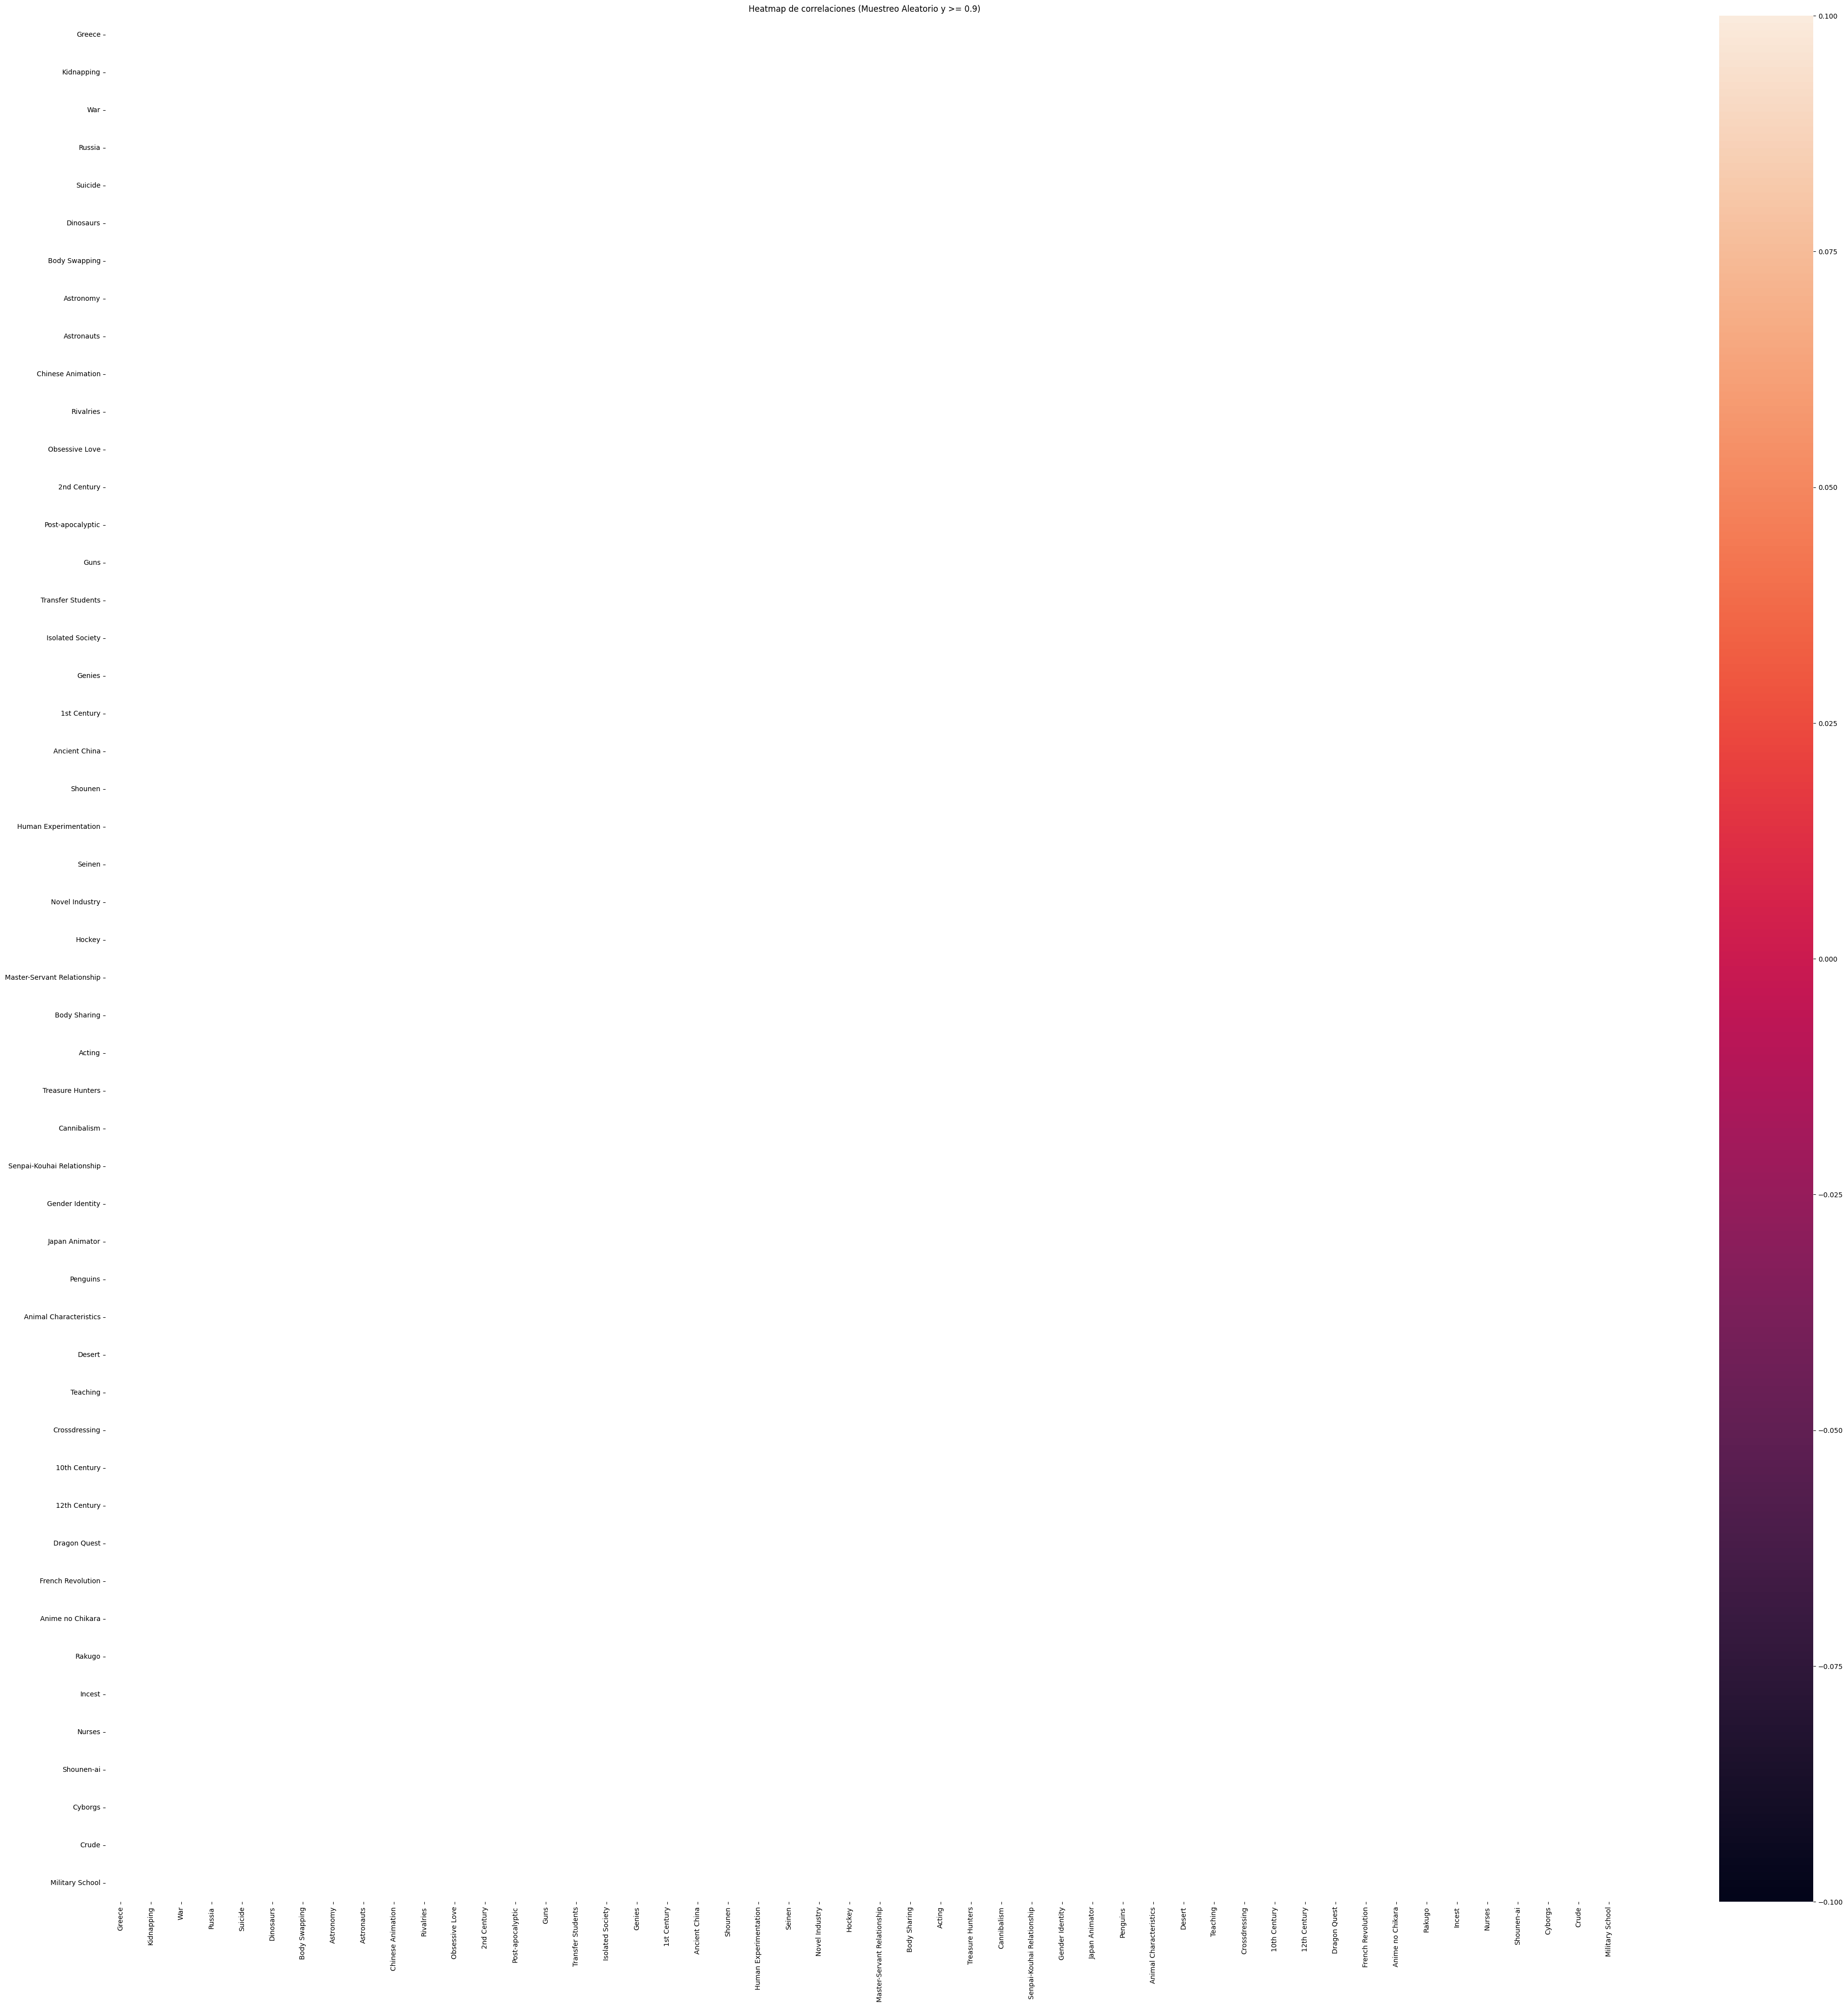

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


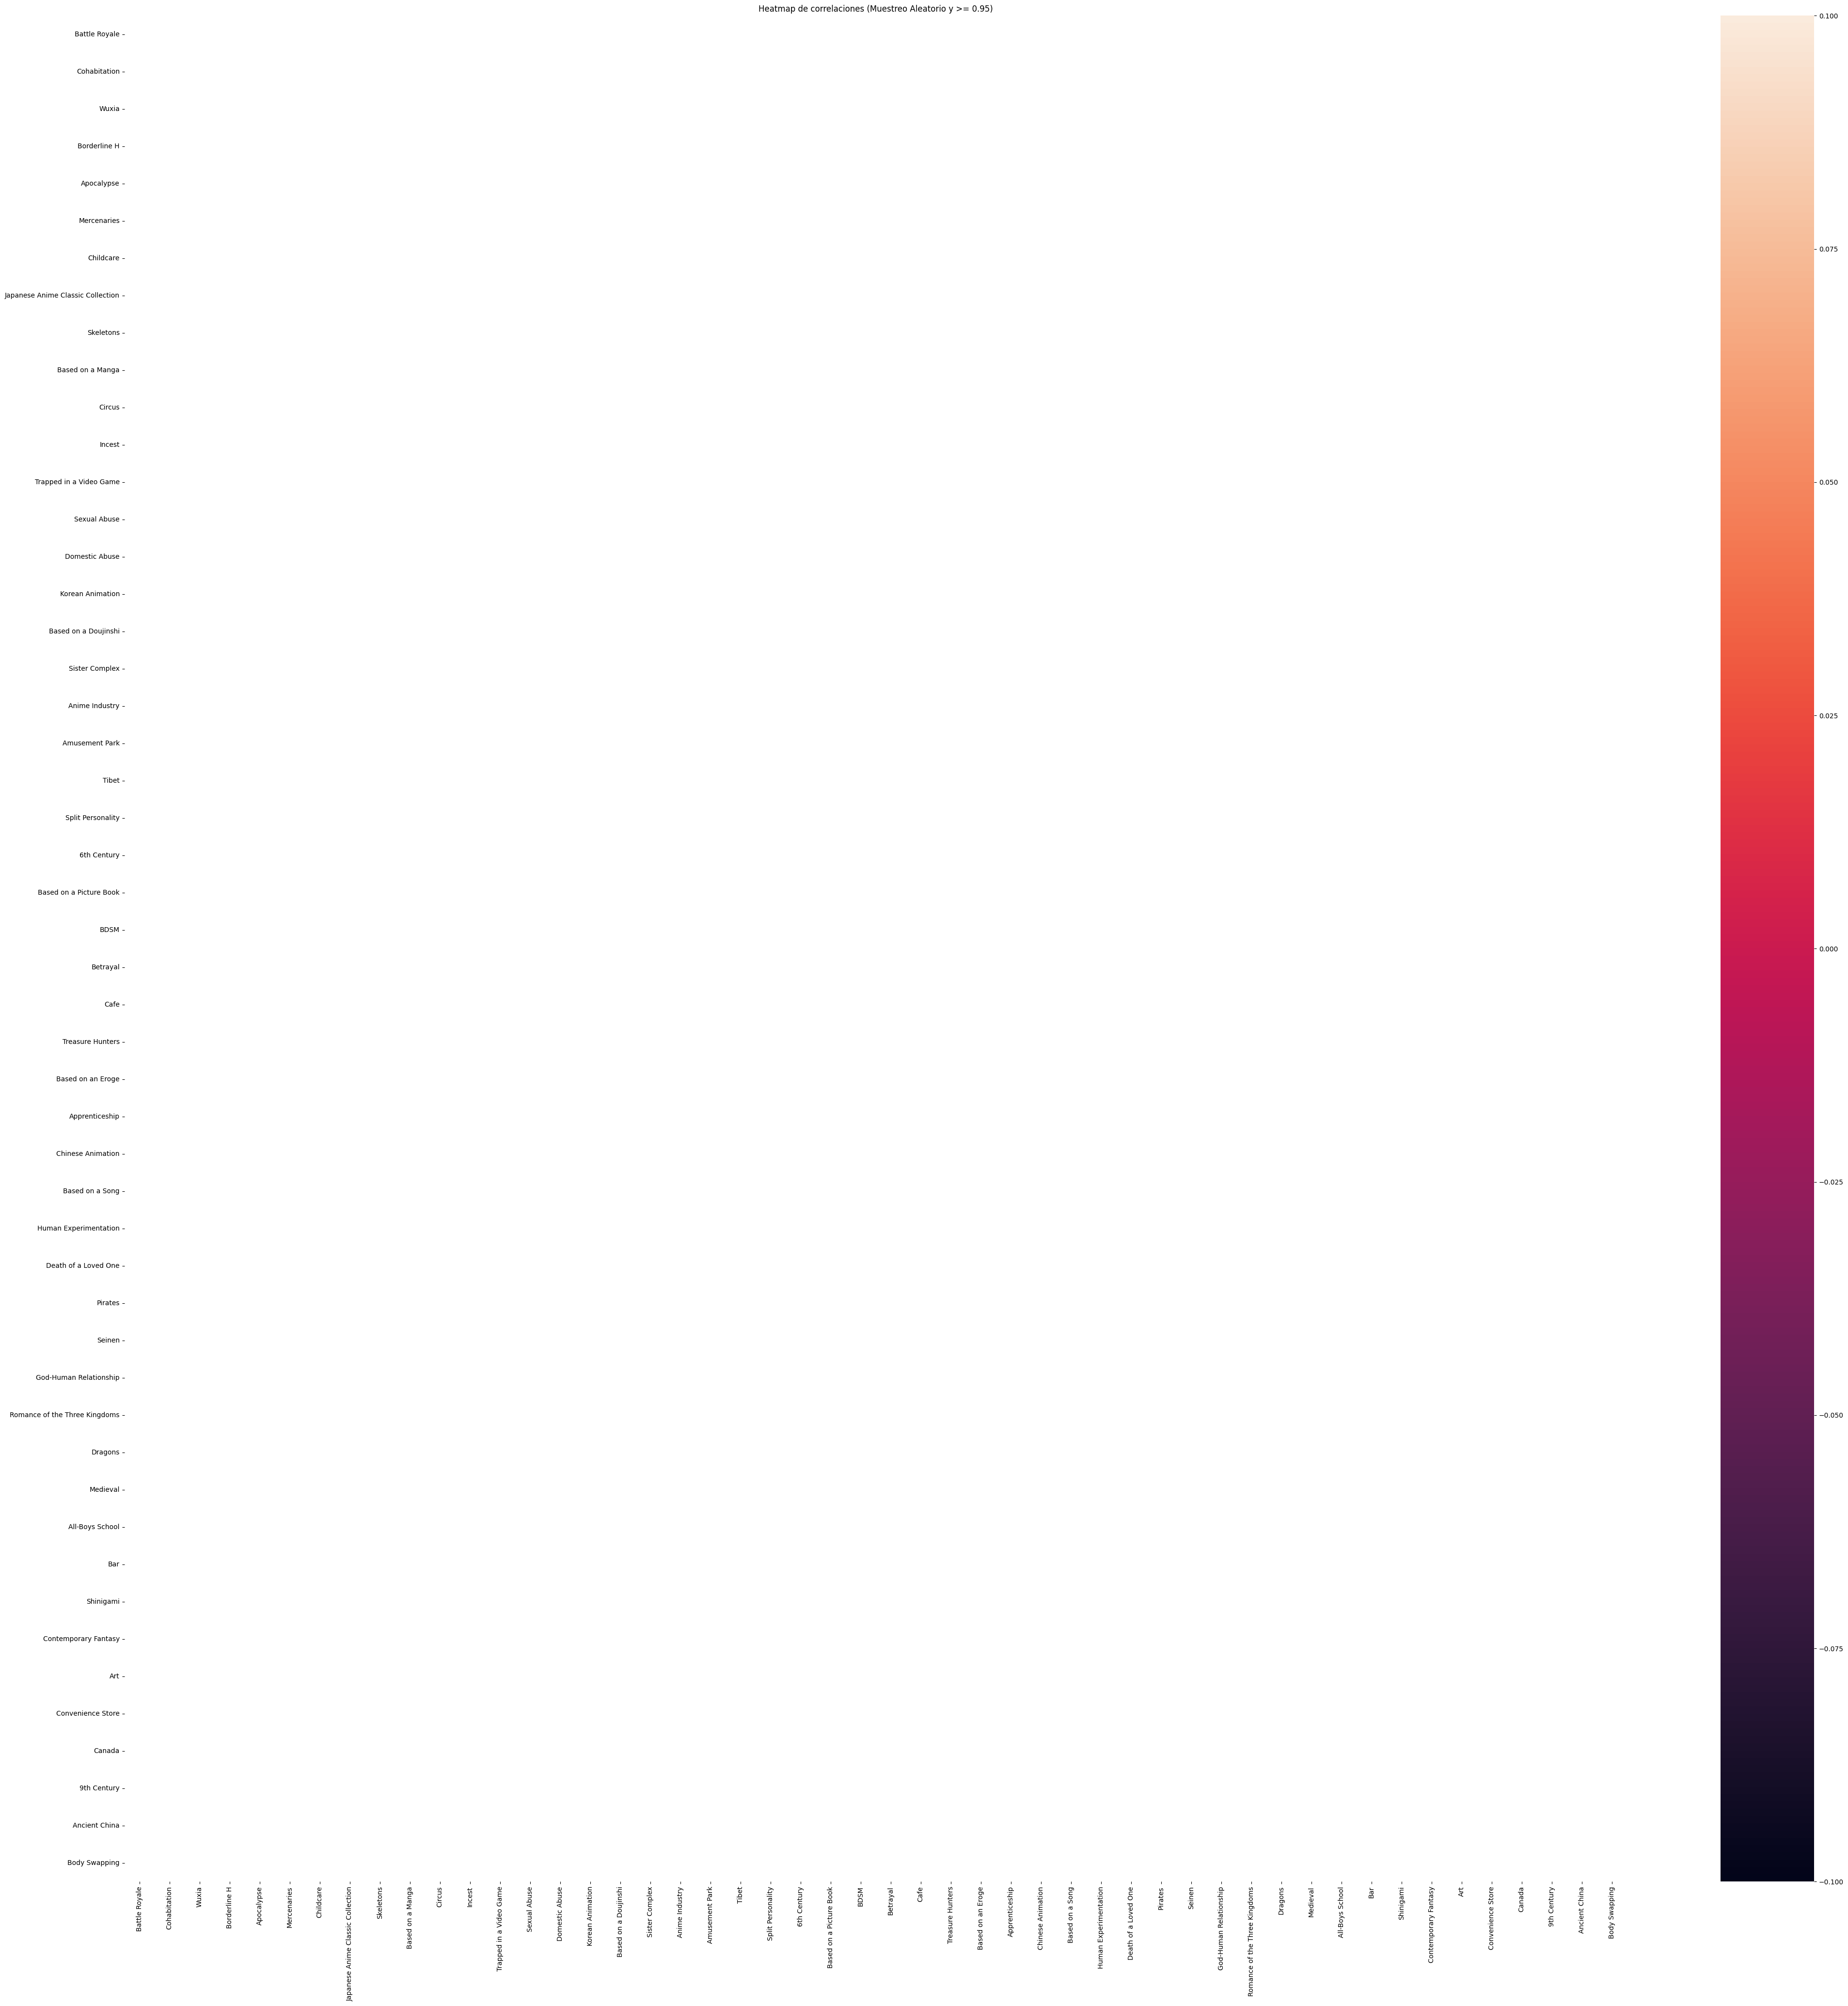

In [170]:
# Correlacción de forma gráfica.

# El plan es el siguiente: Dado que hay muchas columnas, solo se considerarán las correlacciones
# que sea >= 0.5. En otro gráfico, para ampliar, correlacciones >=0.7. En otro, >=0.9. Y por
# último, en otro gráfico, >=0.95.

# Para ello, se hará un bucle que itere sobre los valores de correlacción que se quieren
# considerar. En cada iteración, se hará un subset del DataFrame de correlacciones, considerando
# solamente las correlacciones que sean >= al valor de correlacción que se está considerando en la
# iteración actual. Luego, se hará un heatmap con el subset. Sin embargo, no considerar la diagonal
# donde la correlacción es 1, ya que no tiene sentido considerar la correlacción de un tag consigo
# mismo. Además, se hará un subplot para cada iteración, para que se vea mejor.

# Se considerarán los siguientes valores de correlacción: 0.5, 0.7, 0.9, 0.95

# Número máximo de columnas a mostrar en el heatmap
max_columns_to_show = 50

# Lista de valores de correlación a considerar
corr_values_to_show = [0.25, 0.5, 0.7, 0.9, 0.95]

for corr_value in corr_values_to_show:
    # Seleccionar un subconjunto aleatorio de columnas
    random_columns = random.sample(
        tags_animes.columns.tolist(),
        k=min(max_columns_to_show, len(tags_animes.columns)),
    )

    # Crear el subset de correlaciones
    corr_subset = tags_animes[random_columns].corr()

    # Filtrar solo las correlaciones que son >= al valor de correlación deseado
    corr_subset = corr_subset[corr_subset.abs() >= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones (Muestreo Aleatorio y >= {corr_value})")

    # Mostrar el heatmap
    plt.show()

In [171]:
# En específico, imprimir las correlaciones >= 0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() >= 0.95]

print("Correlaciones >= 0.95:")
for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]): # type: ignore
            print(f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}")

Correlaciones >= 0.95:
	Shounen-ai y BL tienen una correlación de 0.9663636959773808
	BL y Shounen-ai tienen una correlación de 0.9663636959773808
	19th Century y 9th Century tienen una correlación de 0.9918273596851055
	Shoujo-ai y GL tienen una correlación de 0.9666218349898308
	GL y Shoujo-ai tienen una correlación de 0.9666218349898308
	9th Century y 19th Century tienen una correlación de 0.9918273596851055


Veamos las correlaciones positivas más significativas:

Shounen-ai y BL tiene sentido si se buscan ambos conceptos en internet, pues aluden a lo mismo o
muy similar. Básicamente, la noción de romance.

19th Century y 9th Century también puede que tenga sentido, pues puede tratarse de obras históricas
que cubren grandes períodos de tiempo.

GL y Shoujo-ai también tiene sentido, pues aluden a lo mismo o muy similar. Básicamente, la noción
de romance.

Ampliar el margen de búsqueda para ver si se encuentran más correlaciones positivas significativas:

In [172]:
# En específico, imprimir las correlaciones >= 0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() >= 0.75]

print("Correlaciones >= 0.75:")
for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):  # type: ignore
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones >= 0.75:
	Running y Track and Field tienen una correlación de 0.8163736053142695
	Yaoi y Yaoi Hand Syndrome tienen una correlación de 0.7743632515266058
	Martial Arts y Art tienen una correlación de 0.9170254575234761
	Go y Gods tienen una correlación de 0.9372175589335273
	Bathhouse y 2nd Century tienen una correlación de 0.8164351139512451
	Shounen-ai y BL tienen una correlación de 0.9663636959773808
	Dentists y Japan Animator tienen una correlación de 0.8164351139512462
	Earthquake y Natural Disaster tienen una correlación de 0.9257503607720563
	Gods y Go tienen una correlación de 0.9372175589335273
	Tokusatsu y Sentai tienen una correlación de 0.8241756767141515
	Adult Couples y Mature Romance tienen una correlación de 0.7562466148932122
	Illness y Mental Illness tienen una correlación de 0.7702257674101951
	8th Century y 18th Century tienen una correlación de 0.774363251526605
	18th Century y 8th Century tienen una correlación de 0.774363251526605
	Mature Romance y A

Viendo un vistazo rápido a lo obtenido, parece tener sentido la correlación altamente positiva
entre dichos tags, dado que los tags aluden a conceptos similares o muy relacionados intrínsecamente.

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


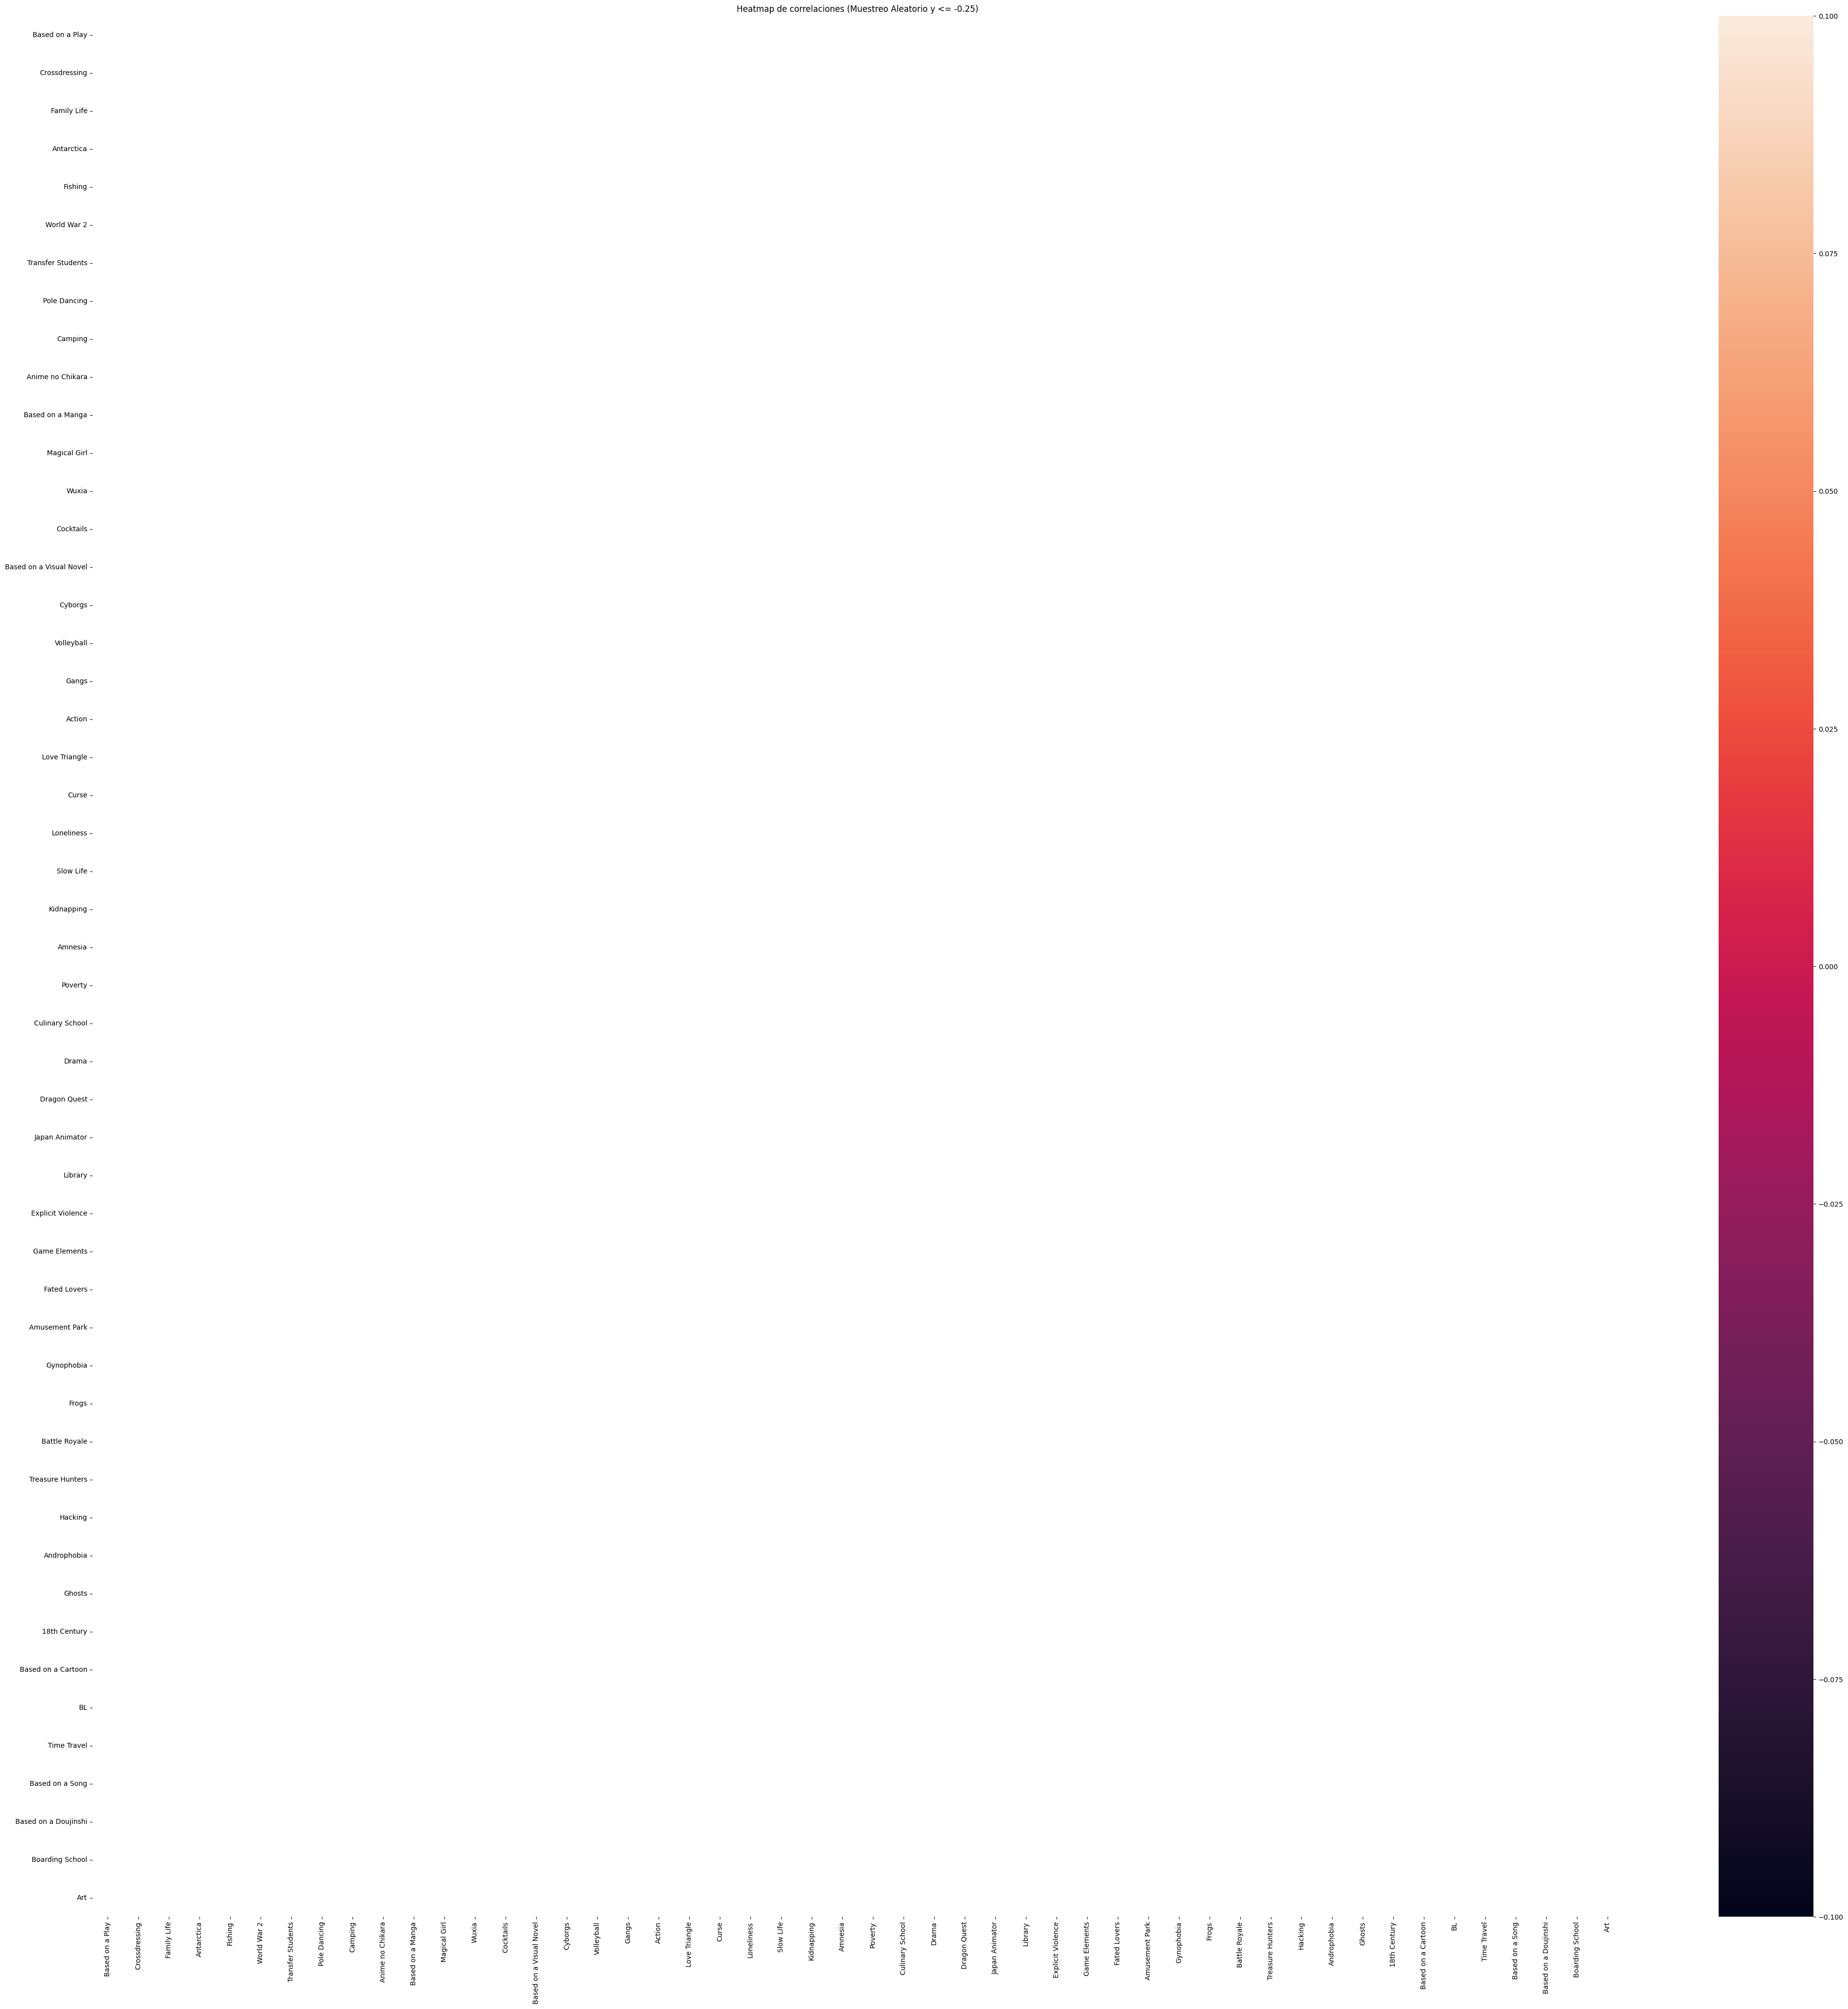

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


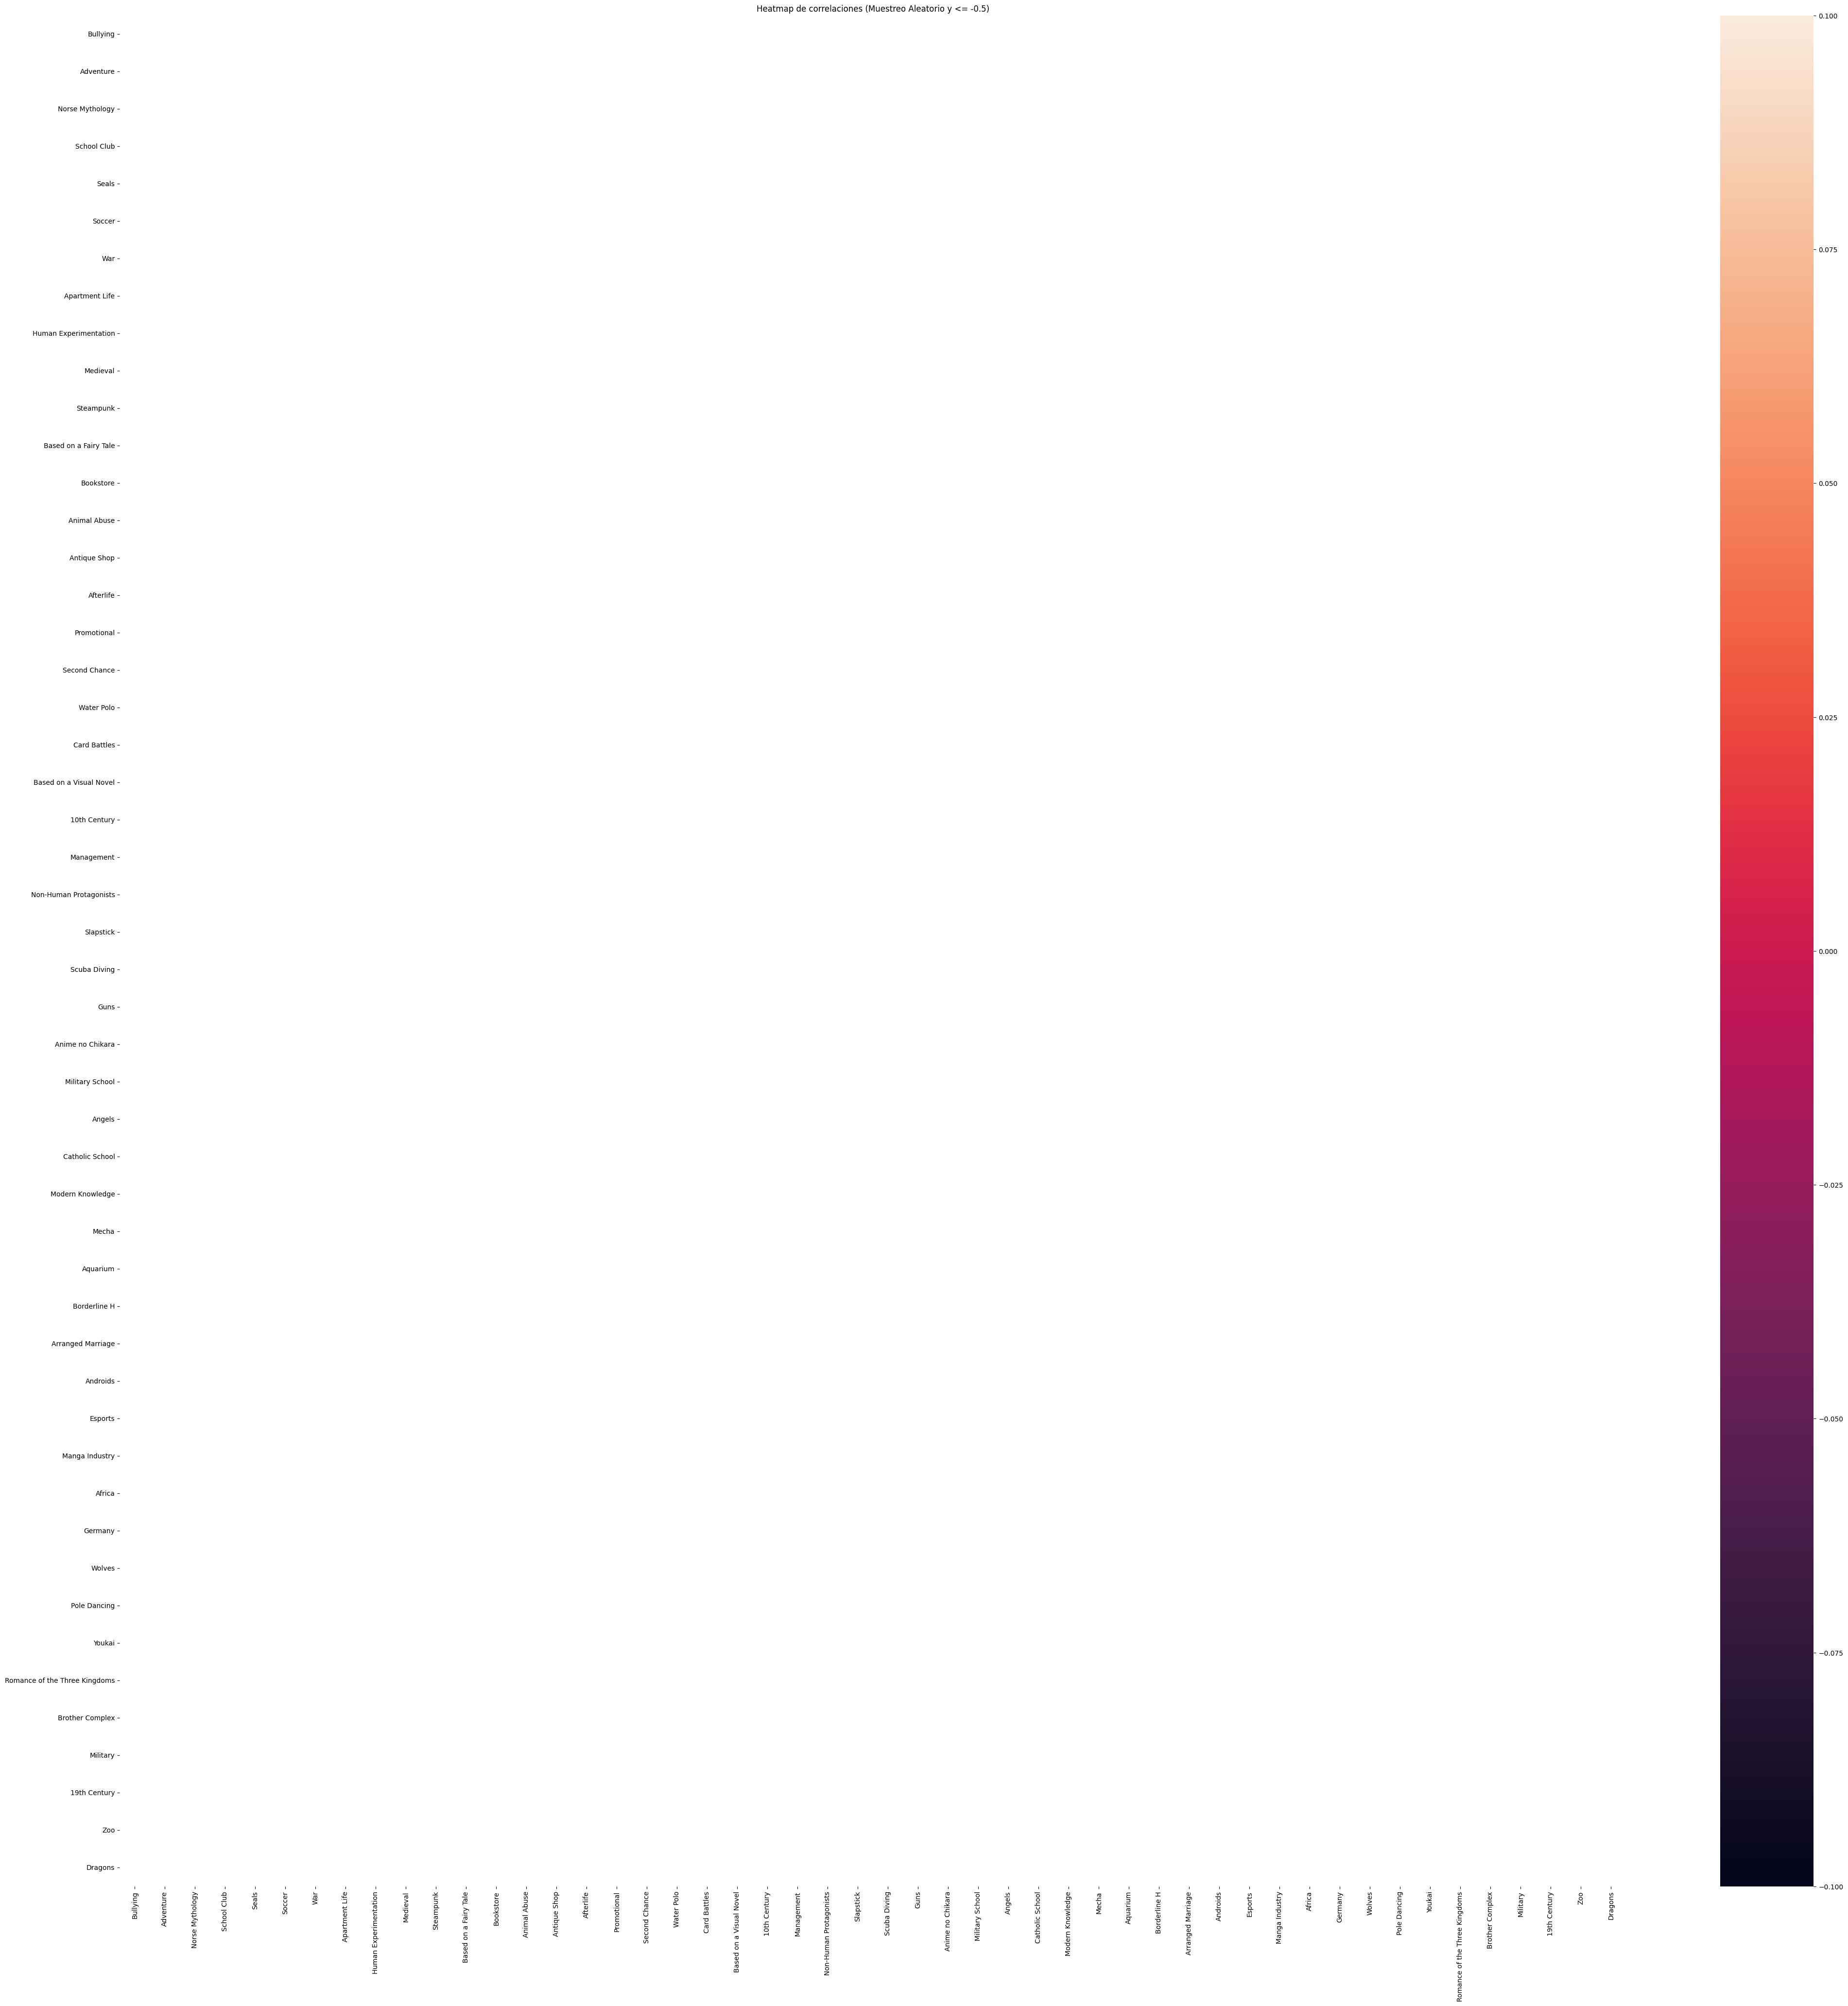

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


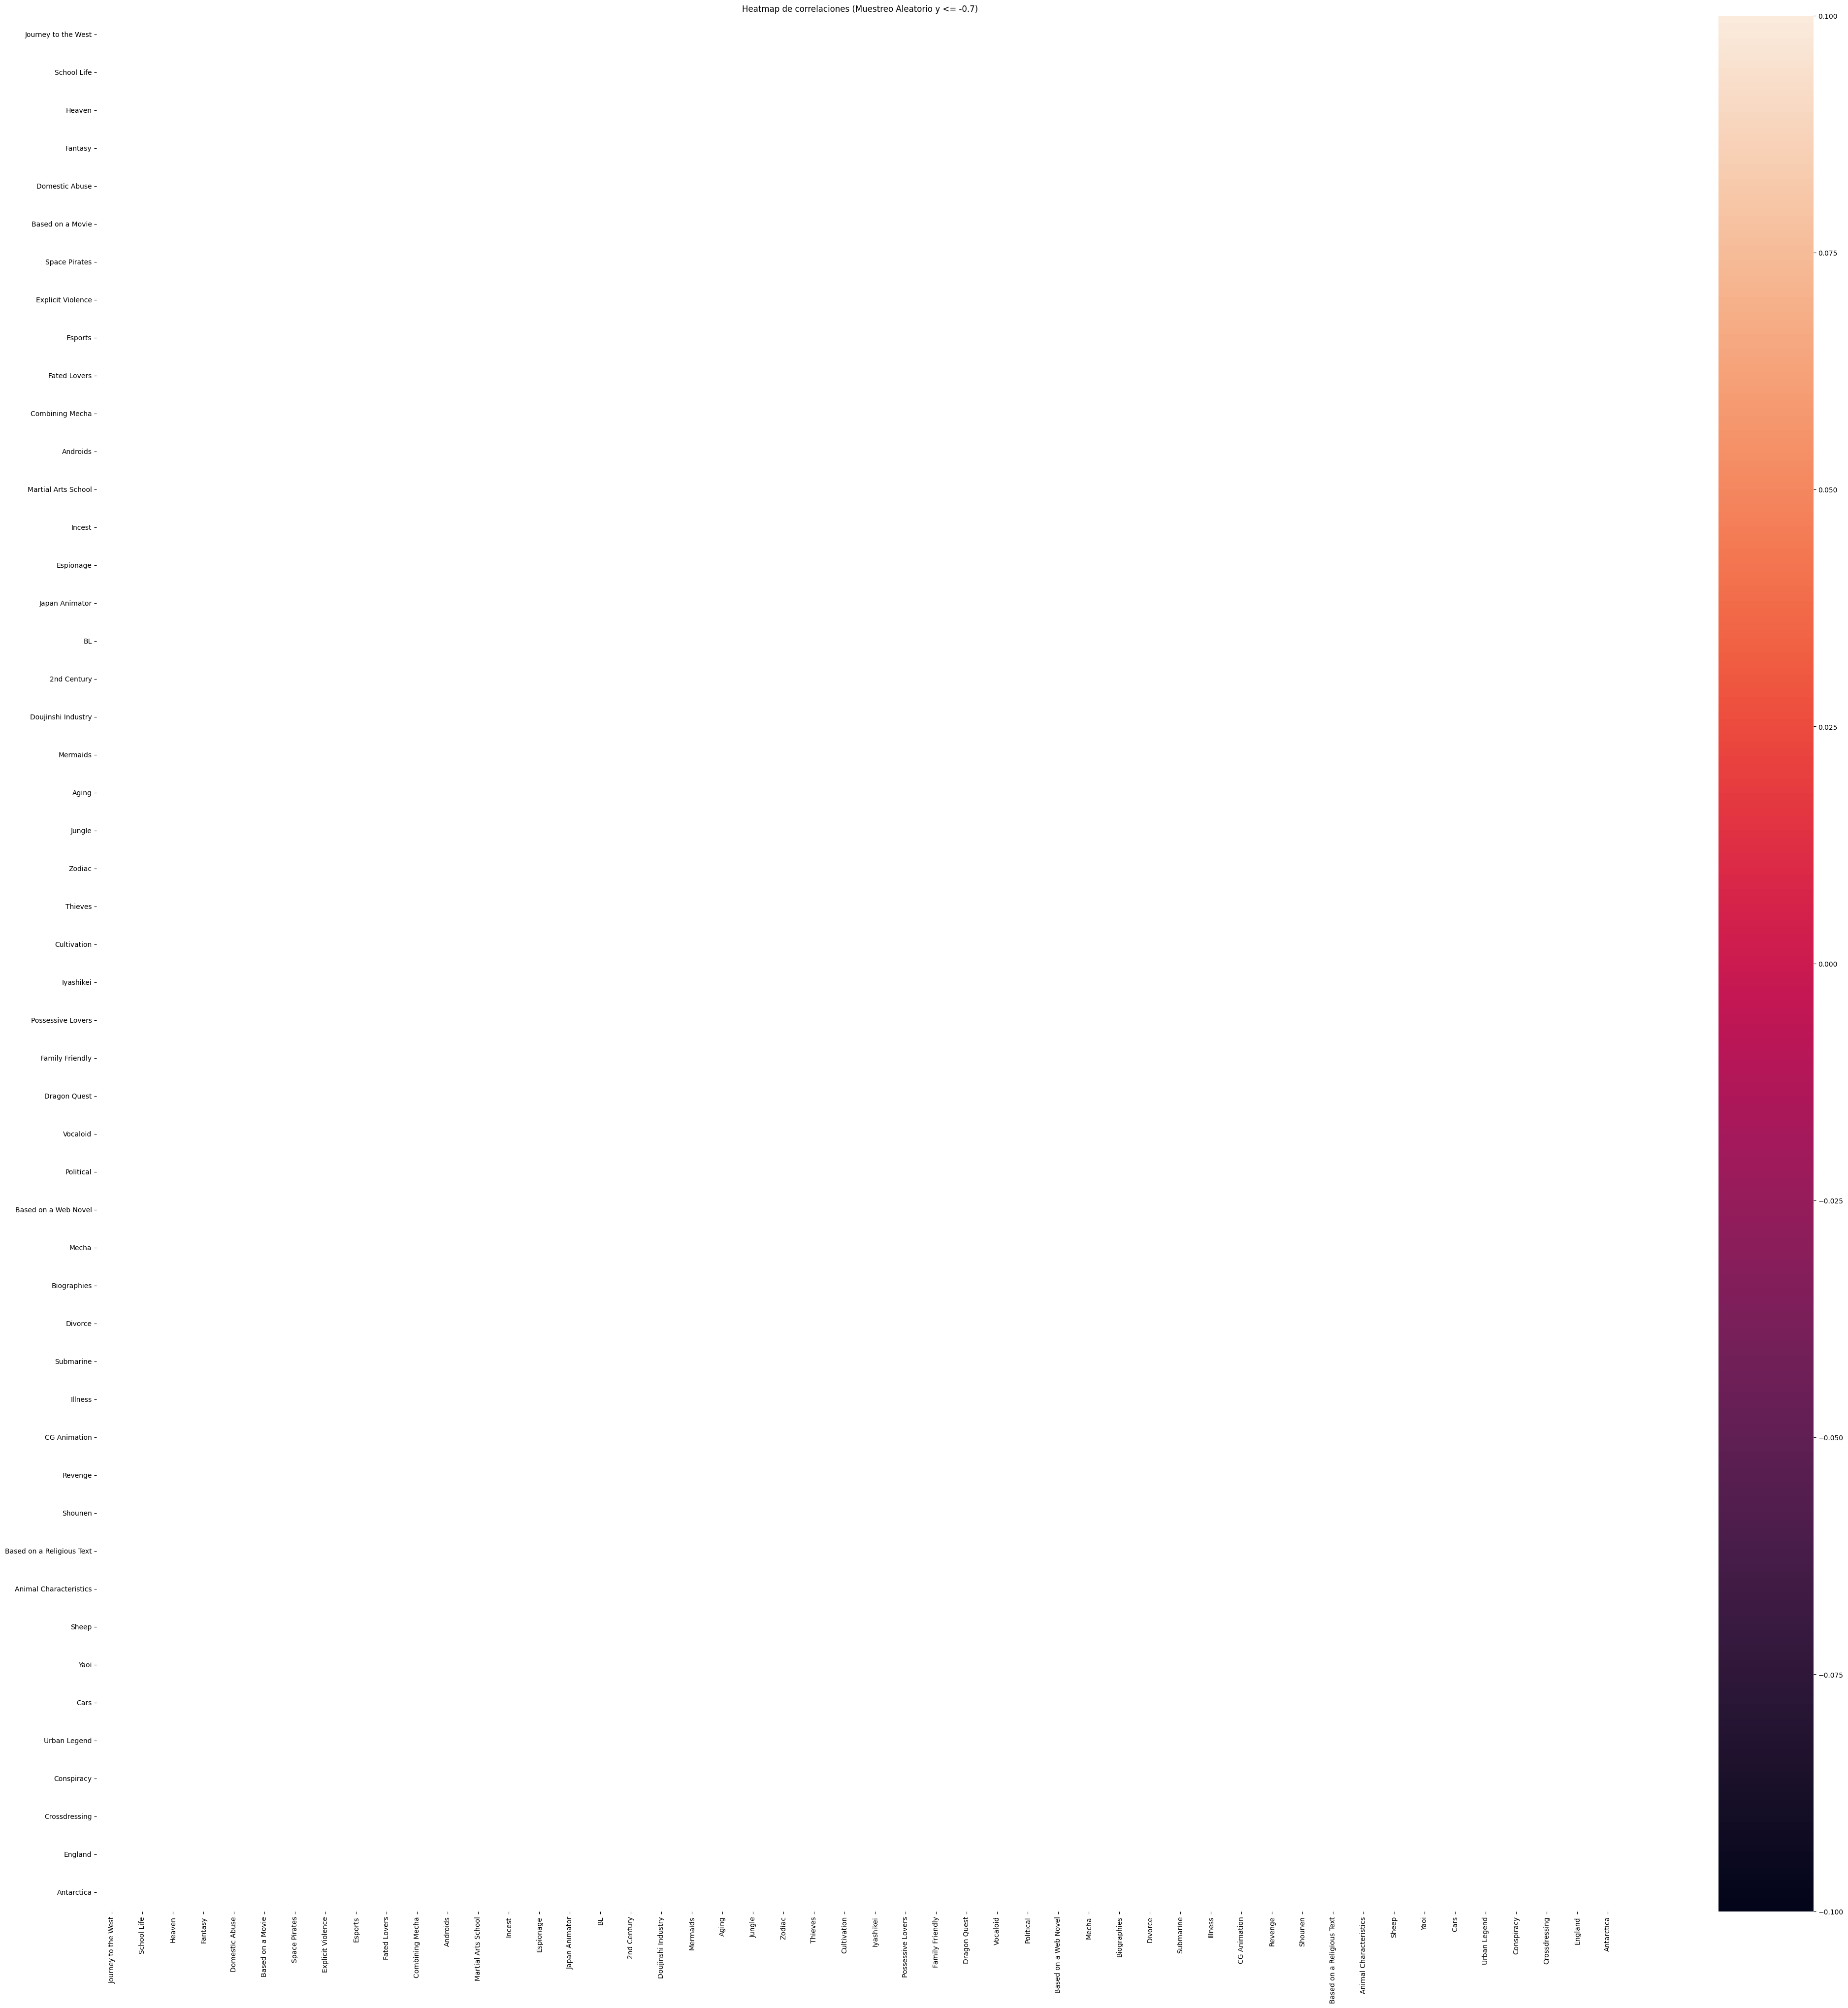

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


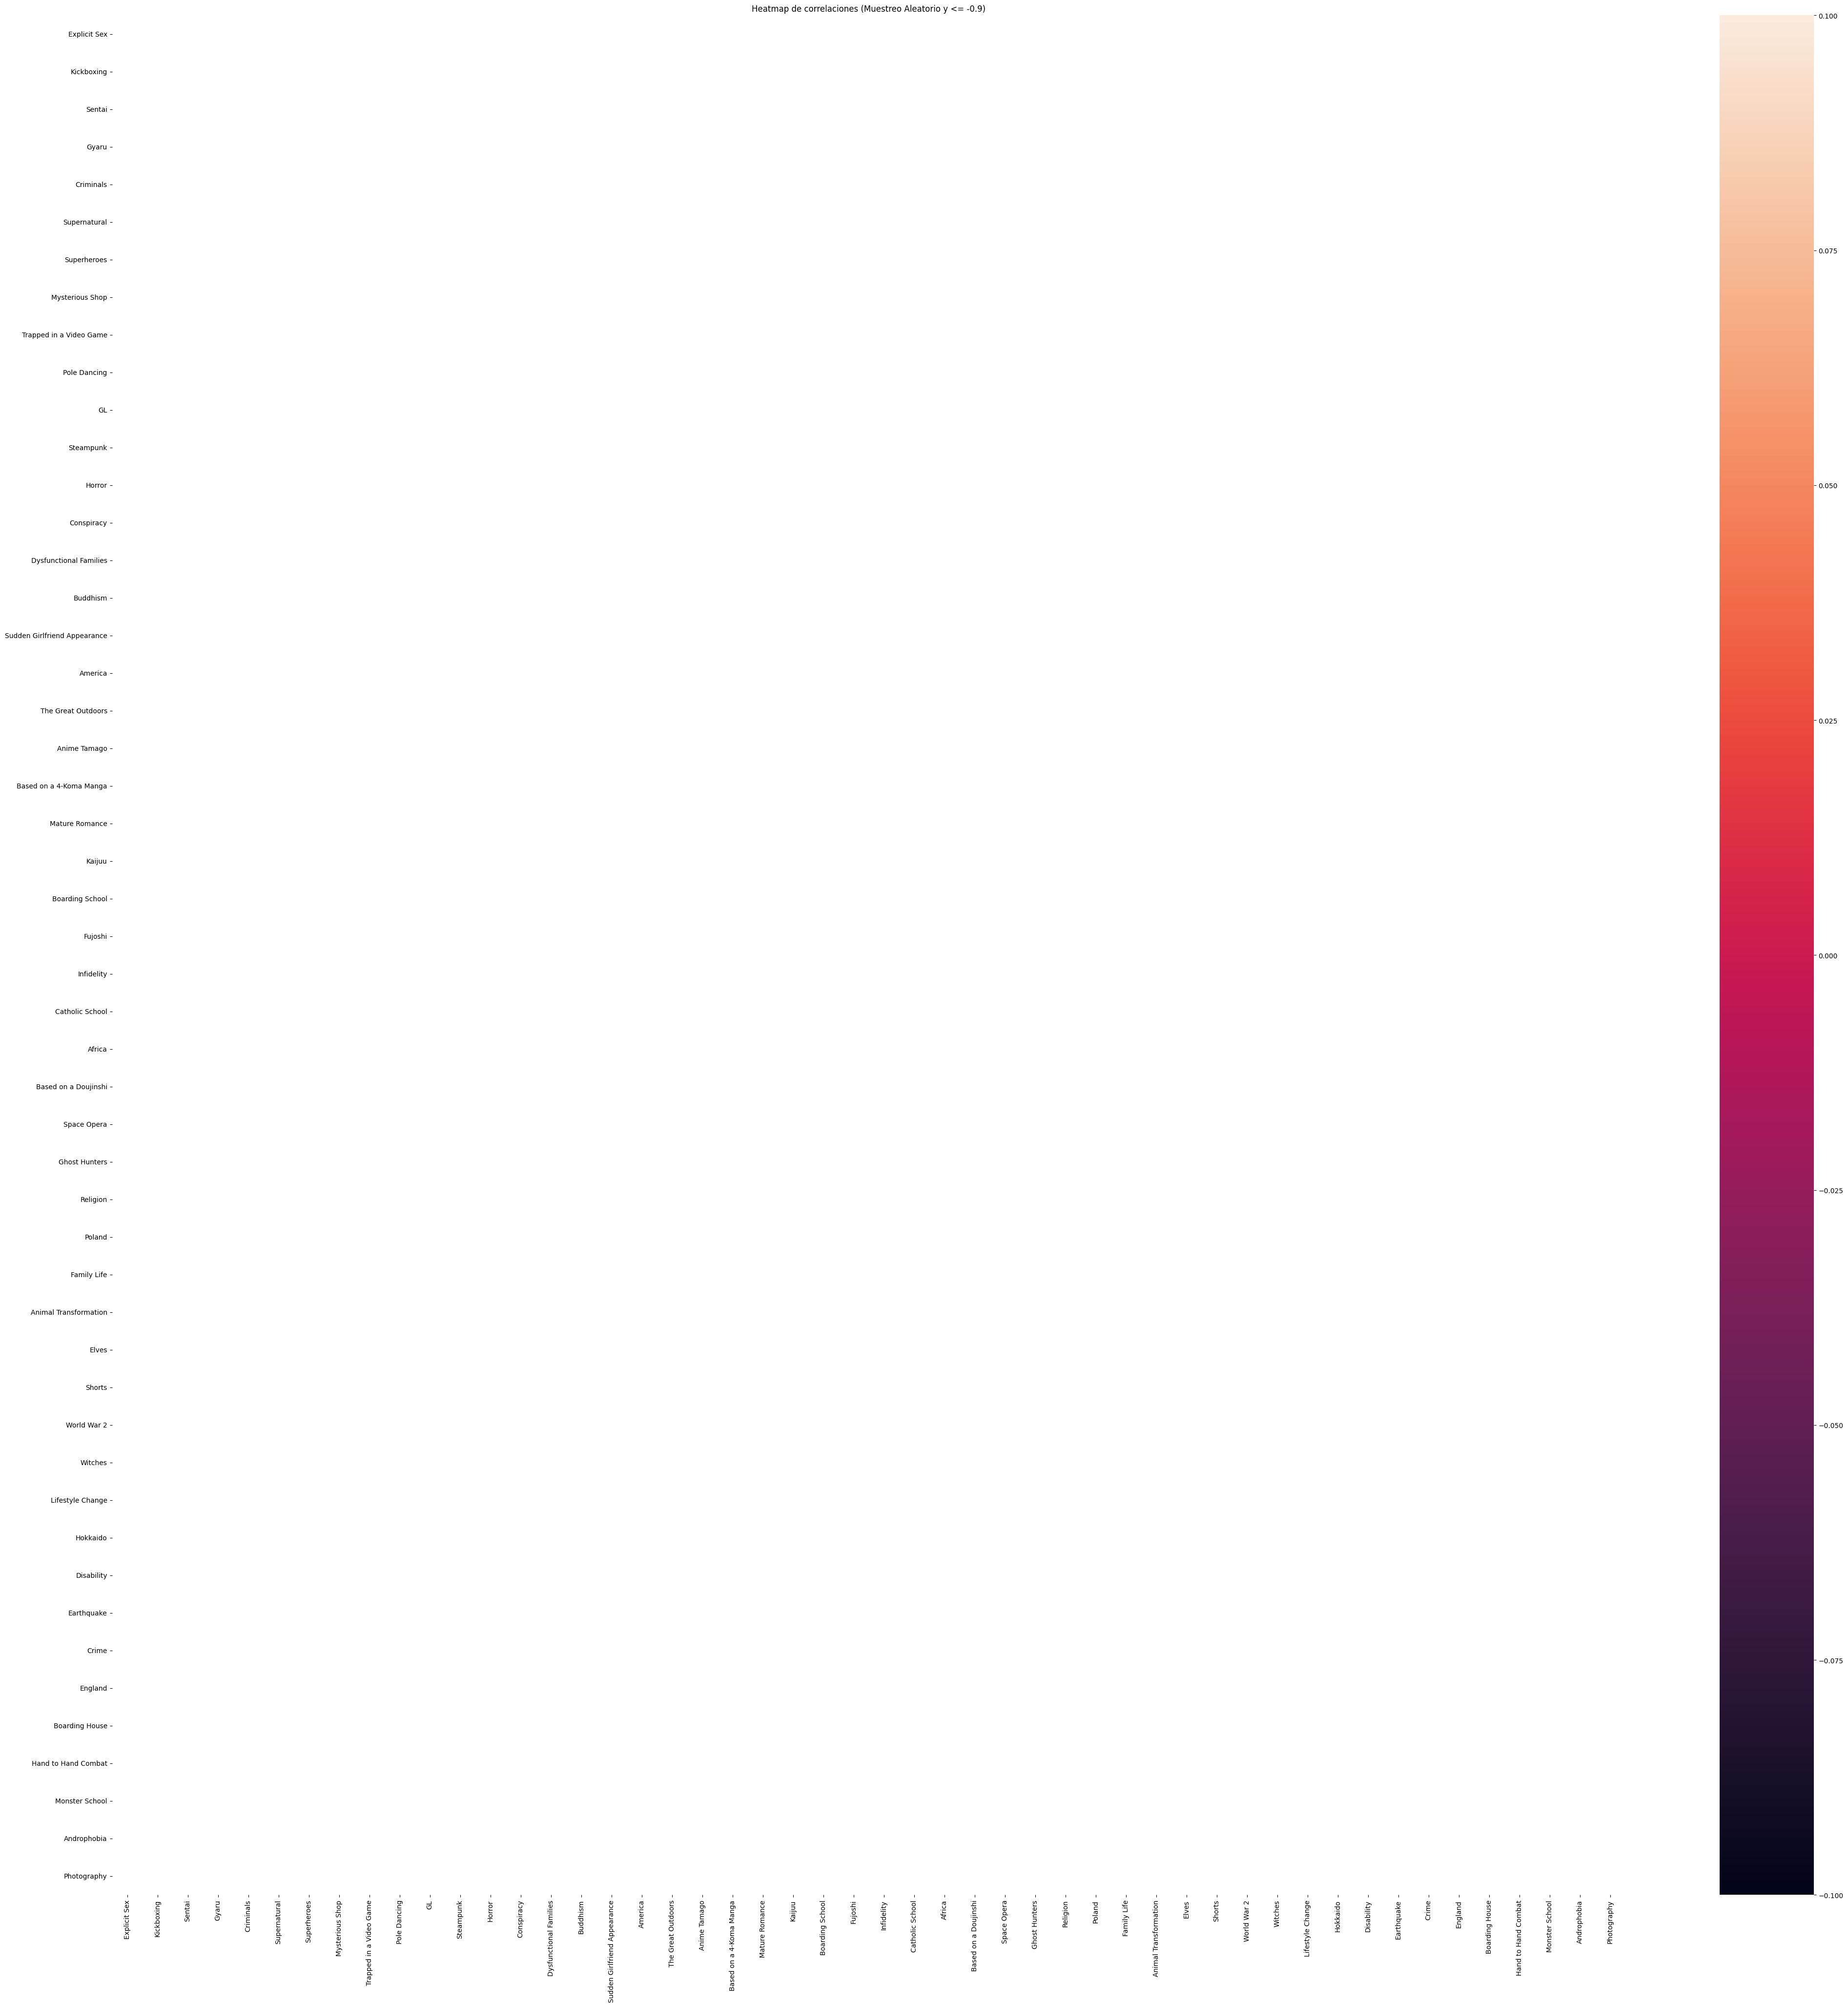

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


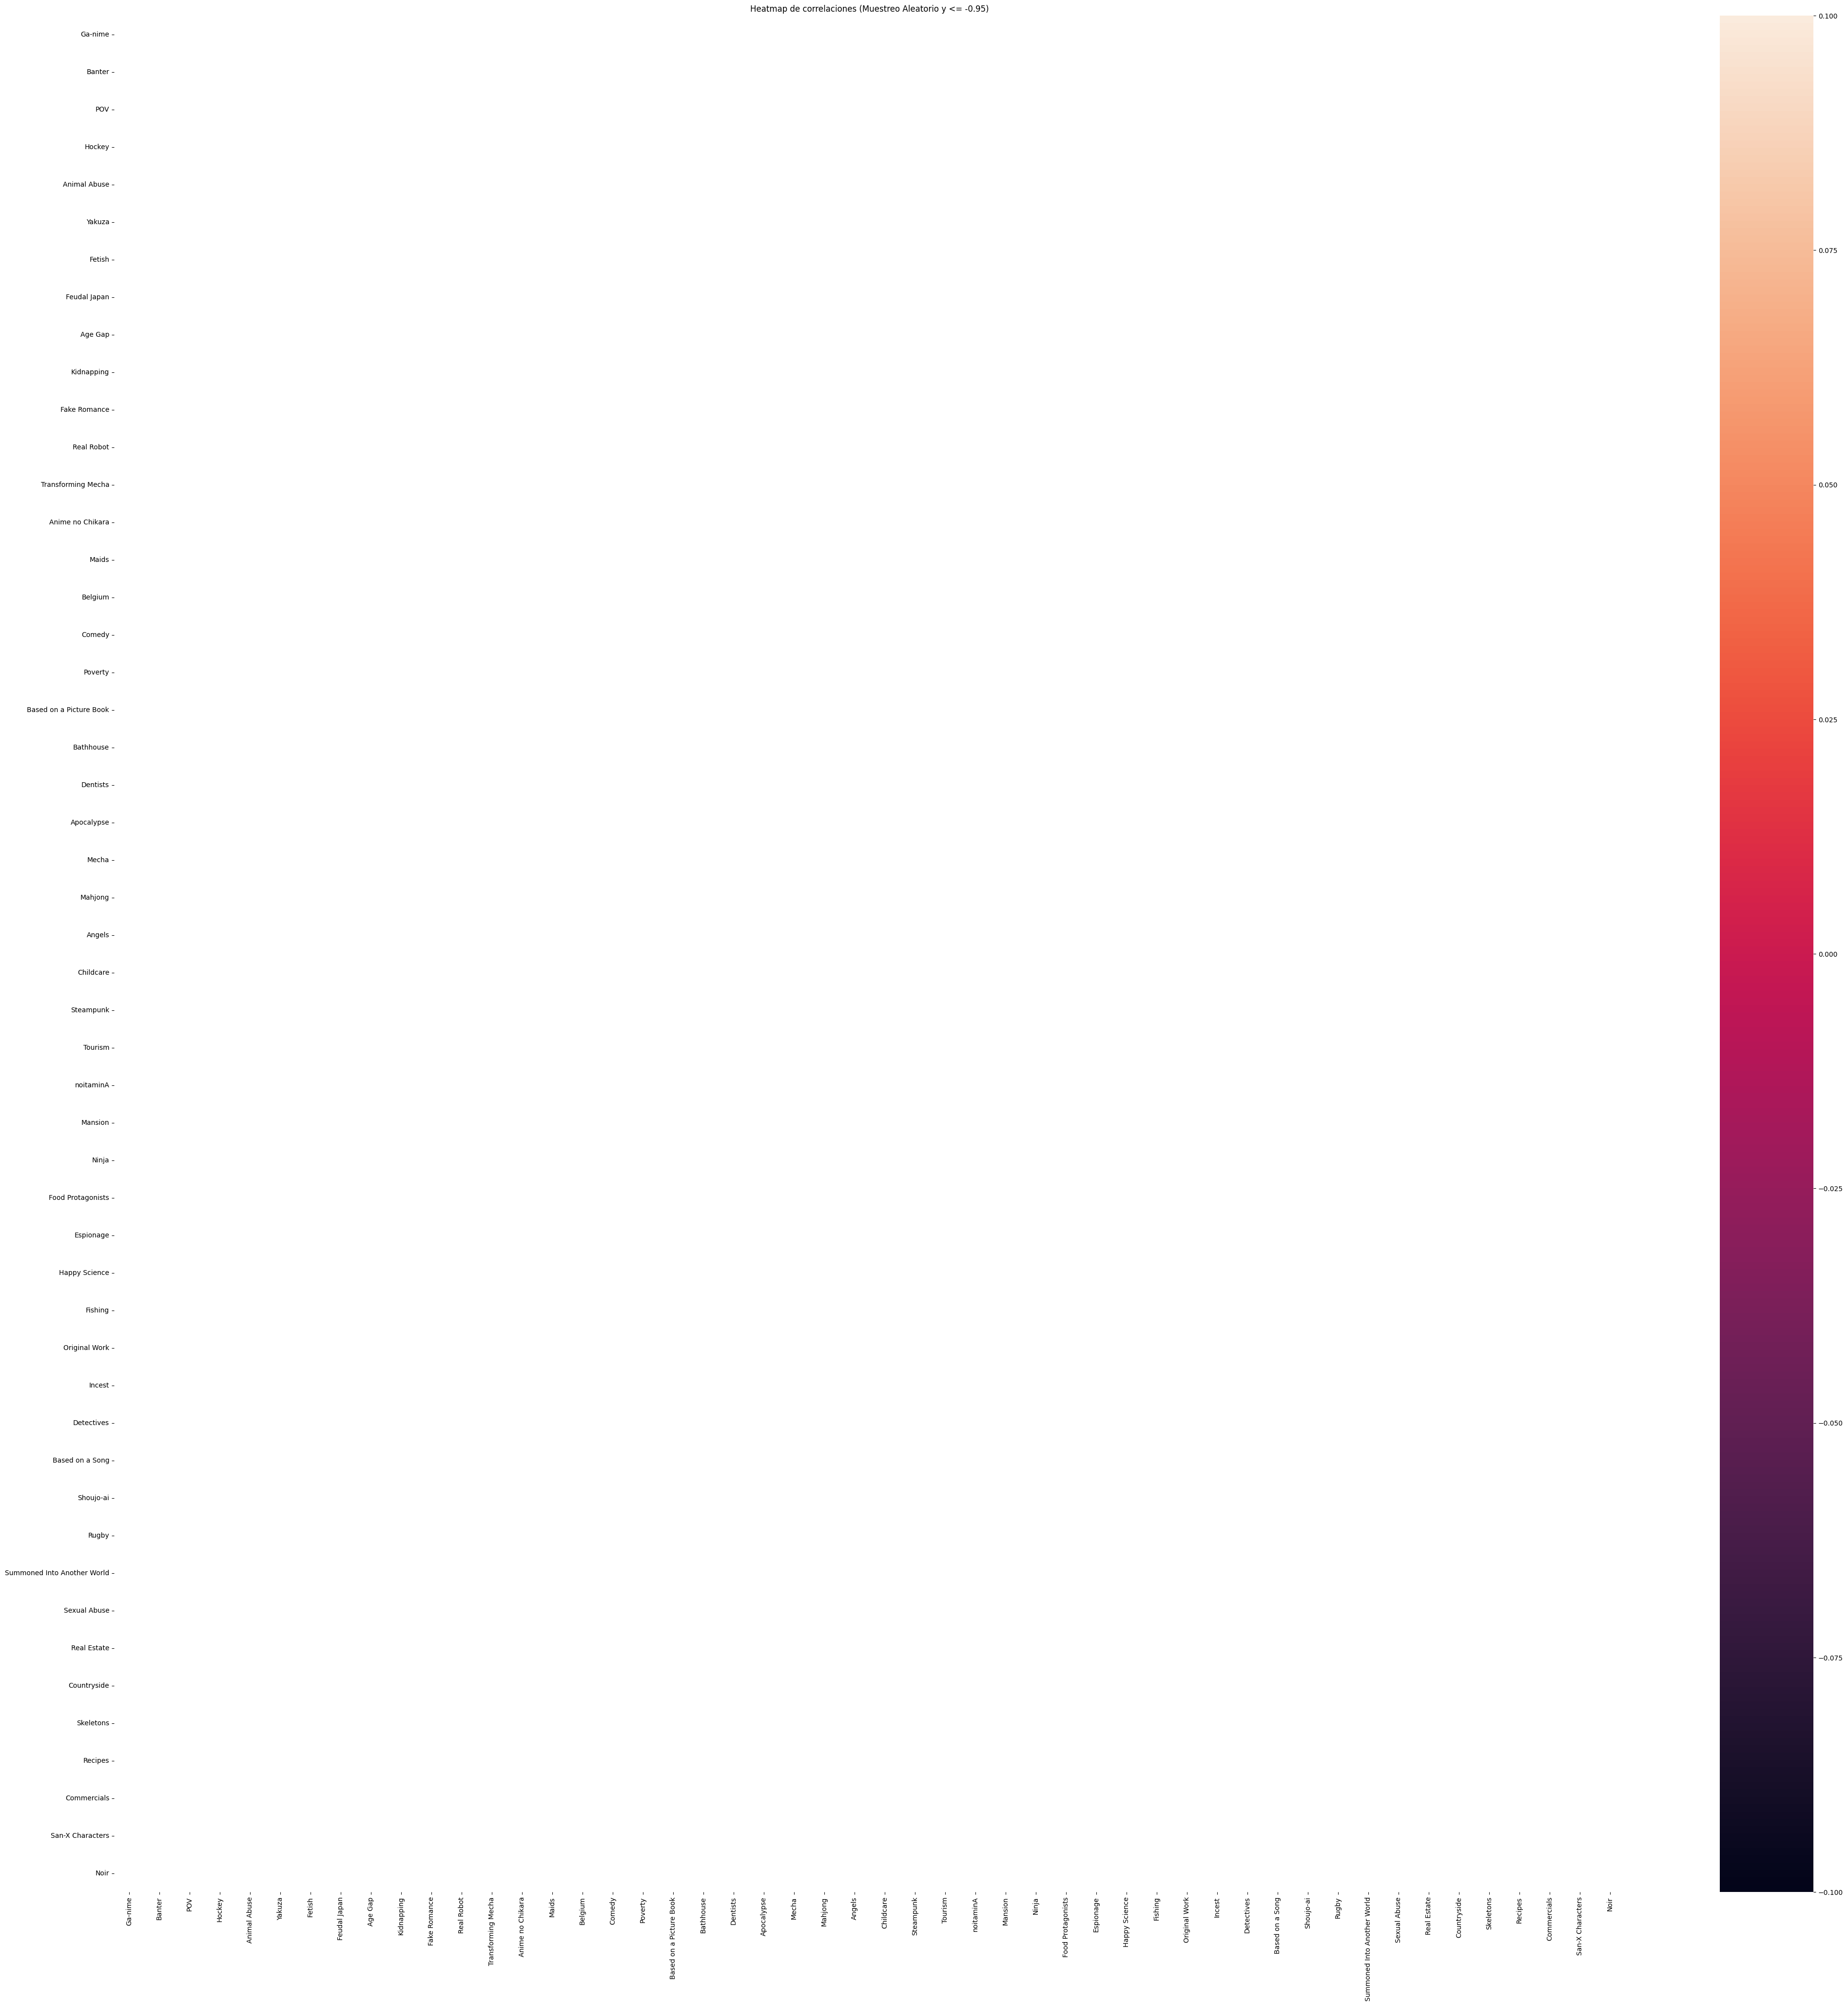

In [173]:
# Ahora, lo mismo de los heatmaps, pero viendo correlacciones negativas. De la misma forma, pero
# usando valores de correlacción negativos.

# Número máximo de columnas a mostrar en el heatmap
max_columns_to_show = 50

# Lista de valores de correlación a considerar
corr_values_to_show = [-0.25, -0.5, -0.7, -0.9, -0.95]

for corr_value in corr_values_to_show:
    # Seleccionar un subconjunto aleatorio de columnas
    random_columns = random.sample(
        tags_animes.columns.tolist(),
        k=min(max_columns_to_show, len(tags_animes.columns)),
    )

    # Crear el subset de correlaciones
    corr_subset = tags_animes[random_columns].corr()

    # Filtrar solo las correlaciones que son <= al valor de correlación deseado
    corr_subset = corr_subset[corr_subset.abs() <= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones (Muestreo Aleatorio y <= {corr_value})")

    # Mostrar el heatmap
    plt.show()

In [174]:
# En específico, imprimir las correlaciones <= -0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.95]

print("Correlaciones <= -0.95:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}")

Correlaciones <= -0.95:


Como no se halló nada, ampliemos la brecha.

In [111]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.75]

print("Correlaciones <= -0.75:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.75:


Ampliemos la brecha aún más.

In [113]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.5]

print("Correlaciones <= -0.5:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.5:


Ampliemos la brecha una última vez.

In [175]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.25]

print("Correlaciones <= -0.25:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.25:
	Original Work y Based on a Manga tienen una correlación de -0.3515390637899467
	Based on a Manga y Original Work tienen una correlación de -0.3515390637899467


No parecen existir correlaciones negativas muy significativas entre los tags, aunque la hallada con
un valor aprox de -0.35 tiene bastante sentido lógico.

Ello, porque que un anime sea "Original Work" se opone a que sea "Based on a Manga", y viceversa,
puesto que explican cosas opuestas. El primer tag habla sobre una creación original, mientras que
el segundo sobre una adaptación de un manga. 

Lo coherente es observar que un anime no puede ser ambas cosas a la vez (no ser puede estar basado
y al mismo ser original), por lo que es lógico que
exista cierta correlación negativa entre ambos tags.

In [176]:
# Columna útil para los gráficos siguientes

tags_animes["Cantidad de Tags"] = tags_animes.sum(axis=1)

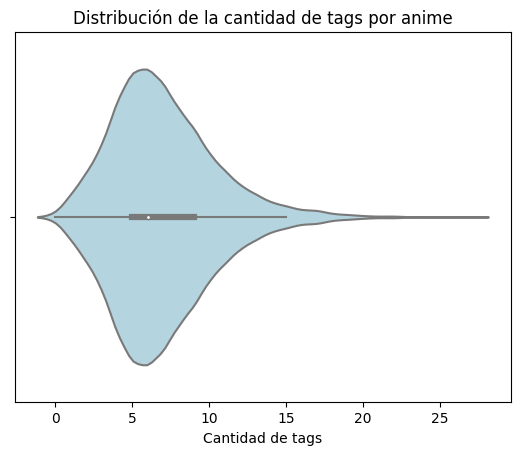

In [177]:
# Violin plot de la cantidad de tags por anime

# Crea un Violin Plot


sns.violinplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Etiqueta del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico
plt.title("Distribución de la cantidad de tags por anime")

# Mostrar el gráfico
plt.show()

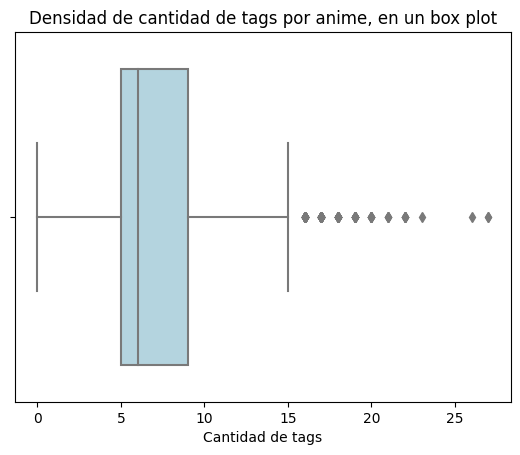

In [178]:
# Box plot de la cantidad de tags por anime

sns.boxplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico

plt.title("Densidad de cantidad de tags por anime, en un box plot")

# Mostrar el gráfico

plt.show()

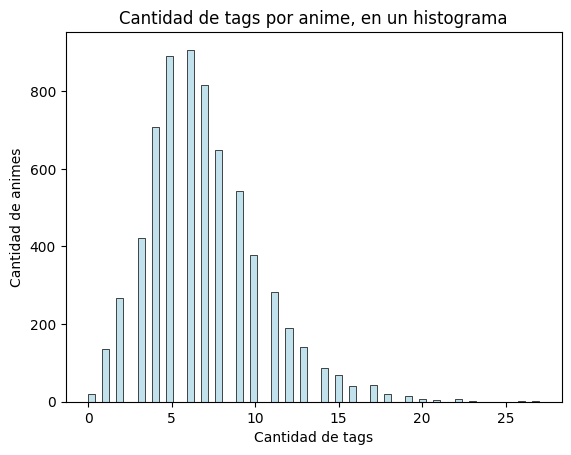

In [179]:
# Histograma que muestra la cantidad de tags por anime

sns.histplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y
plt.ylabel("Cantidad de animes")

# Título del gráfico

plt.title("Cantidad de tags por anime, en un histograma")

# Mostrar el gráfico

plt.show()

Text(0.5, 1.0, 'Medidas de tendencia de la cantidad de tags por anime')

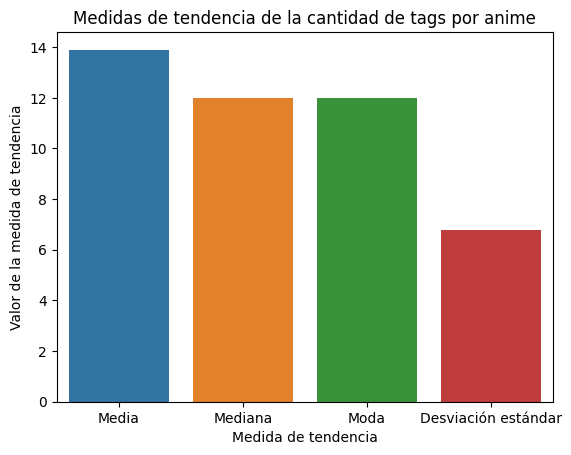

In [183]:
# Distribución en un gráfico de barras sobre distintas medidas de tendencia de la cantidad de tags
# por anime (media, mediana, moda, desviación estándar)

# Obtener la media, mediana, moda y desviación estándar de la cantidad de tags por anime

mean = tags_animes.sum(axis=1).mean()
median = tags_animes.sum(axis=1).median()
mode = tags_animes.sum(axis=1).mode()[0]
std = tags_animes.sum(axis=1).std()

# Crear el gráfico de barras

sns.barplot(x=["Media", "Mediana", "Moda", "Desviación estándar"], y=[mean, median, mode, std])

# Label del eje x

plt.xlabel("Medida de tendencia")

# Label del eje y

plt.ylabel("Valor de la medida de tendencia")

# Título del gráfico

plt.title("Medidas de tendencia de la cantidad de tags por anime")

In [184]:
print(f"Se obtuvo una media de {mean}, una mediana de {median}, una moda de {mode} y una desviación estándar de {std}. Si comparamos los valores, tenemos lo siguiente:")

if mean > median:
    print("\tLa media es mayor que la mediana")
elif mean < median:
    print("\tLa media es menor que la mediana")
if mean > mode:
    print("\tLa media es mayor que la moda")
elif mean < mode:
    print("\tLa media es menor que la moda")
if mean > std:
    print("\tLa media es mayor que la desviación estándar")
elif mean < std:
    print("\tLa media es menor que la desviación estándar")
if median > mode:
    print("\tLa mediana es mayor que la moda")
elif median < mode:
    print("\tLa mediana es menor que la moda")
if median > std:
    print("\tLa mediana es mayor que la desviación estándar")
elif median < std:
    print("\tLa mediana es menor que la desviación estándar")
if mode > std:
    print("\tLa moda es mayor que la desviación estándar")
elif mode < std:
    print("\tLa moda es menor que la desviación estándar")
    

Se obtuvo una media de 13.899157134256471, una mediana de 12.0, una moda de 12 y una desviación estándar de 6.77796097452205. Si comparamos los valores, tenemos lo siguiente:
	La media es mayor que la mediana
	La media es mayor que la moda
	La media es mayor que la desviación estándar
	La mediana es mayor que la desviación estándar
	La moda es mayor que la desviación estándar
